# Recomender Model for LLM Generated Meal Recipes

This project is part of the Business Analytics and Machine Learning course which I took at TUM. The main objective is to classify LLM generated recipes into the ones users like or dislike (binary classification). The task was very interesting and moderately challenging given the time constraints during the course. I decided to give it another try and see what can be done if I don't have a time limit. 

## Dataset overview: 
- Over 140'000 reviews of 75'000 recipes.
- 25 fields across four tables:
    - diet
    - recipes
    - requests
    - reviews

# 1 Exploratory Data Analysis

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# Ensuring reproducability
RANDOM_SEED = 2024
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# Set pandas display option for floats to 2 decimal points
pd.set_option('display.float_format', lambda x: f'{x:.2f}')

## 1.1. Diet

In [2]:
diet = pd.read_csv("diet.csv")
diet.head(5)

,AuthorId,Diet,Age
0,10000120E,Vegetarian,46
1,1000014D,Vegan,18
2,1000015A,Vegetarian,58
3,1000016E,Vegetarian,32
4,1000027E,Vegan,61


In [3]:
diet.describe(include='all')

,AuthorId,Diet,Age
count,271907,271906,271907.00
unique,271907,3,NaN
top,10000120E,Vegetarian,NaN
freq,1,143383,NaN
mean,NaN,NaN,48.50
std,NaN,NaN,17.90
min,NaN,NaN,18.00
25%,NaN,NaN,33.00
50%,NaN,NaN,48.00
75%,NaN,NaN,64.00


In [4]:
diet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271907 entries, 0 to 271906
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   AuthorId  271907 non-null  object
 1   Diet      271906 non-null  object
 2   Age       271907 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 6.2+ MB


Seems like in this table we have data on customer age and diet preferences. Let's explore the distributions for diet and age

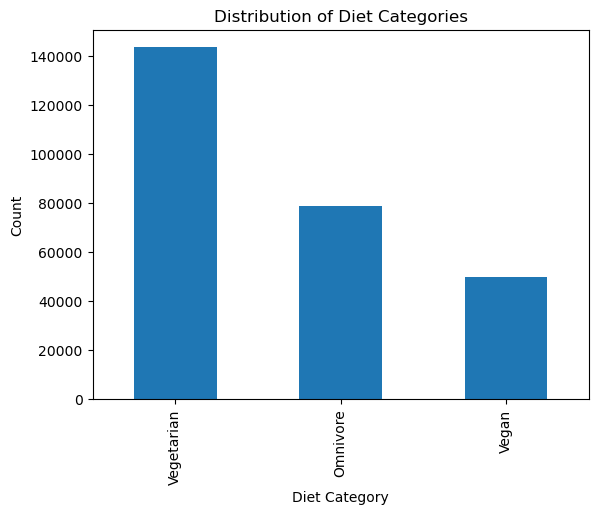

In [5]:
# Count unique values in the column
value_counts = diet['Diet'].value_counts()

# Plot as a bar chart
value_counts.plot(kind='bar')
plt.xlabel('Diet Category')
plt.ylabel('Count')
plt.title('Distribution of Diet Categories')
plt.show()

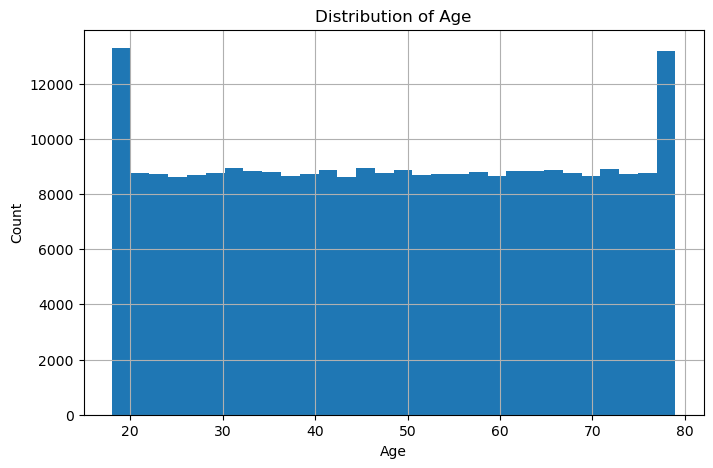

In [6]:
plt.figure(figsize=(8, 5))
diet['Age'].hist(bins=30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

### TODO:
- Diet: convert into categorical dtype()
- Age: there are some outliers, but let's see if we need to do anything with them. Just note them for now. 

## 1.2. Recipes

In [30]:
recipes = pd.read_csv("recipes.csv", dtype={"RecipeId": str})
recipes.head(5)

,RecipeId,Name,CookTime,PrepTime,RecipeCategory,RecipeIngredientQuantities,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield
0,73440,Bow Ties With Broccoli Pesto,0,1800,Other,"c(""\""6\"""", ""\""2\"""", ""\""1 1/2\"""", ""\""1/4\"""", ""\...","c(""\""hazelnuts\"""", ""\""broccoli florets\"""", ""\""...",241.30,10.10,1.20,0.00,13.10,31.80,2.30,1.40,6.70,9.00,NaN
1,365718,Cashew-chutney Rice,3600,600,Other,"c(""\""1\"""", ""\""3/4\"""", ""\""6\"""", ""\""5\"""", ""\""2\""...","c(""\""celery\"""", ""\""onion\"""", ""\""butter\"""", ""\""...",370.80,17.50,7.20,22.90,553.30,44.30,1.60,2.20,9.40,8.00,NaN
2,141757,Copycat Taco Bell Nacho Fries BellGrande,3600,2700,Other,"c(""\""3\"""", ""\""1/2\"""", ""\""1\"""", ""\""1\"""", ""\""3\""...","c(""\""Copycat Taco Bell Seasoned Beef\"""", ""\""ye...",377.60,20.90,10.50,45.70,1501.80,36.60,3.80,6.10,12.90,8.00,NaN
3,280351,Slow Cooker Jalapeno Cheddar Cheese Soup,18000,1800,Other,"c(""\""2\"""", ""\""1\"""", ""\""2\"""", ""\""2\"""", ""\""1\"""",...","c(""\""unsalted butter\"""", ""\""yellow onion\"""", ""...",282.80,16.50,10.30,50.50,630.20,22.80,2.30,2.70,11.70,6.00,NaN
4,180505,Cool & Crisp Citrus Chiffon Pie,3600,1800,Other,"c(""\""1\"""", ""\""1/4\"""", ""\""1/2\"""", ""\""1/2\"""", ""\...","c(""\""unflavored gelatin\"""", ""\""water\"""", ""\""su...",257.50,8.60,2.40,110.70,160.90,39.80,0.40,30.20,6.30,6.00,NaN


In [31]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75604 entries, 0 to 75603
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   RecipeId                    75604 non-null  object 
 1   Name                        75604 non-null  object 
 2   CookTime                    75604 non-null  int64  
 3   PrepTime                    75604 non-null  int64  
 4   RecipeCategory              75604 non-null  object 
 5   RecipeIngredientQuantities  75604 non-null  object 
 6   RecipeIngredientParts       75604 non-null  object 
 7   Calories                    75604 non-null  float64
 8   FatContent                  75604 non-null  float64
 9   SaturatedFatContent         75604 non-null  float64
 10  CholesterolContent          75604 non-null  float64
 11  SodiumContent               75604 non-null  float64
 12  CarbohydrateContent         75604 non-null  float64
 13  FiberContent                756

In [32]:
recipes.describe(include='all')

,RecipeId,Name,CookTime,PrepTime,RecipeCategory,RecipeIngredientQuantities,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield
count,75604,75604,75604.00,75604.00,75604,75604,75604,75604.00,75604.00,75604.00,75604.00,75604.00,75604.00,75604.00,75604.00,75604.00,48891.00,25309
unique,75604,70534,NaN,NaN,7,68882,73920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7919
top,73440,Banana Bread,NaN,NaN,Other,"c(""\""1\"""", ""\""1\"""", ""\""1\"""")",character(0),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 cups
freq,1,30,NaN,NaN,56347,211,304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,656
mean,NaN,NaN,5490.71,3158.60,NaN,NaN,NaN,487.58,24.78,9.67,87.72,765.19,49.29,3.83,22.07,17.65,8.83,NaN
std,NaN,NaN,104346.79,86563.02,NaN,NaN,NaN,1496.38,119.78,52.50,373.44,3579.27,100.52,6.82,71.59,73.21,148.63,NaN
min,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,NaN
25%,NaN,NaN,600.00,600.00,NaN,NaN,NaN,174.70,5.60,1.50,3.80,123.40,12.80,0.80,2.50,3.50,4.00,NaN
50%,NaN,NaN,1200.00,900.00,NaN,NaN,NaN,318.10,13.70,4.70,42.60,356.65,28.20,2.10,6.40,9.10,6.00,NaN
75%,NaN,NaN,2700.00,1200.00,NaN,NaN,NaN,530.40,27.50,10.80,107.80,797.00,51.40,4.50,18.10,25.10,8.00,NaN


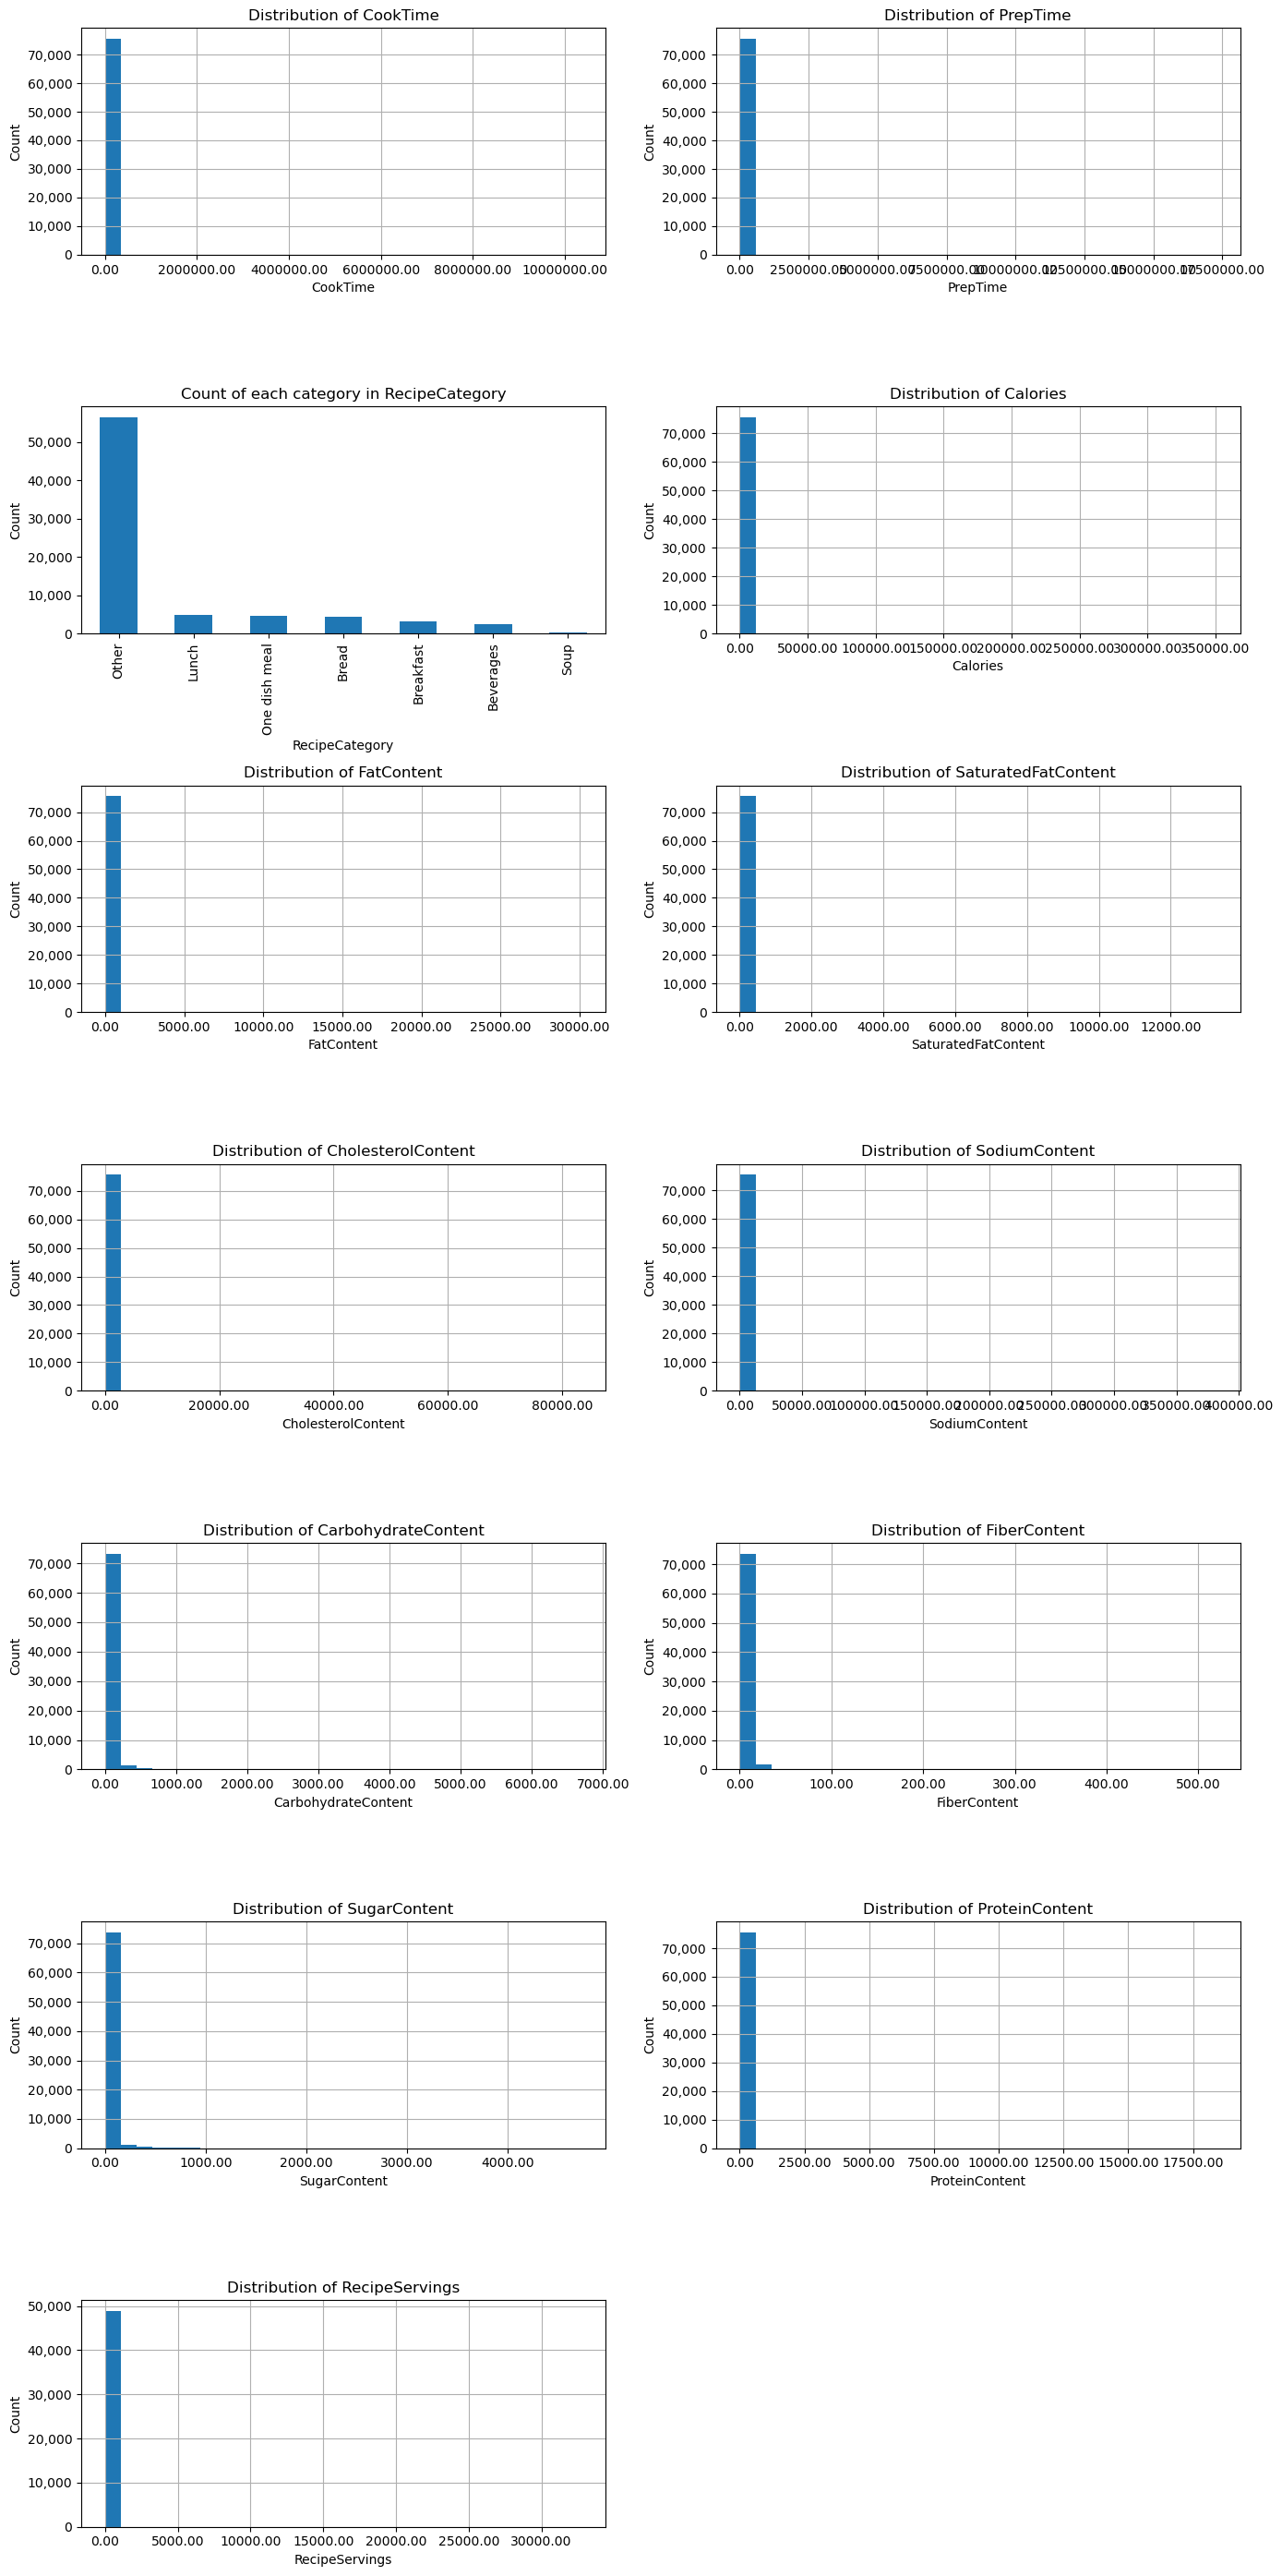

In [33]:
import matplotlib.ticker as mticker
#Plot the distributions of field values
fields_to_plot = ['CookTime', 'PrepTime', 'RecipeCategory', 'Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent', 
                  'SodiumContent',  'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent', 'RecipeServings']

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(14, 28))
axes = axes.flatten()

for idx, col in enumerate(fields_to_plot):
    ax = axes[idx]
    if pd.api.types.is_numeric_dtype(recipes[col]):
        recipes[col].hist(bins=30, ax=ax)
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
        ax.set_title(f'Distribution of {col}')
        ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
    else:
        recipes[col].value_counts().plot(kind='bar', ax=ax)
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
        ax.set_title(f'Count of each category in {col}')
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Hide any unused subplots if fields_to_plot < 14
for j in range(len(fields_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Seems like we have some outliers in the recipes. Let's drop them to see the real distributions. I will set separate ranges for each field with outliers based on plots and descriptive statistics just to have more control over the data. 

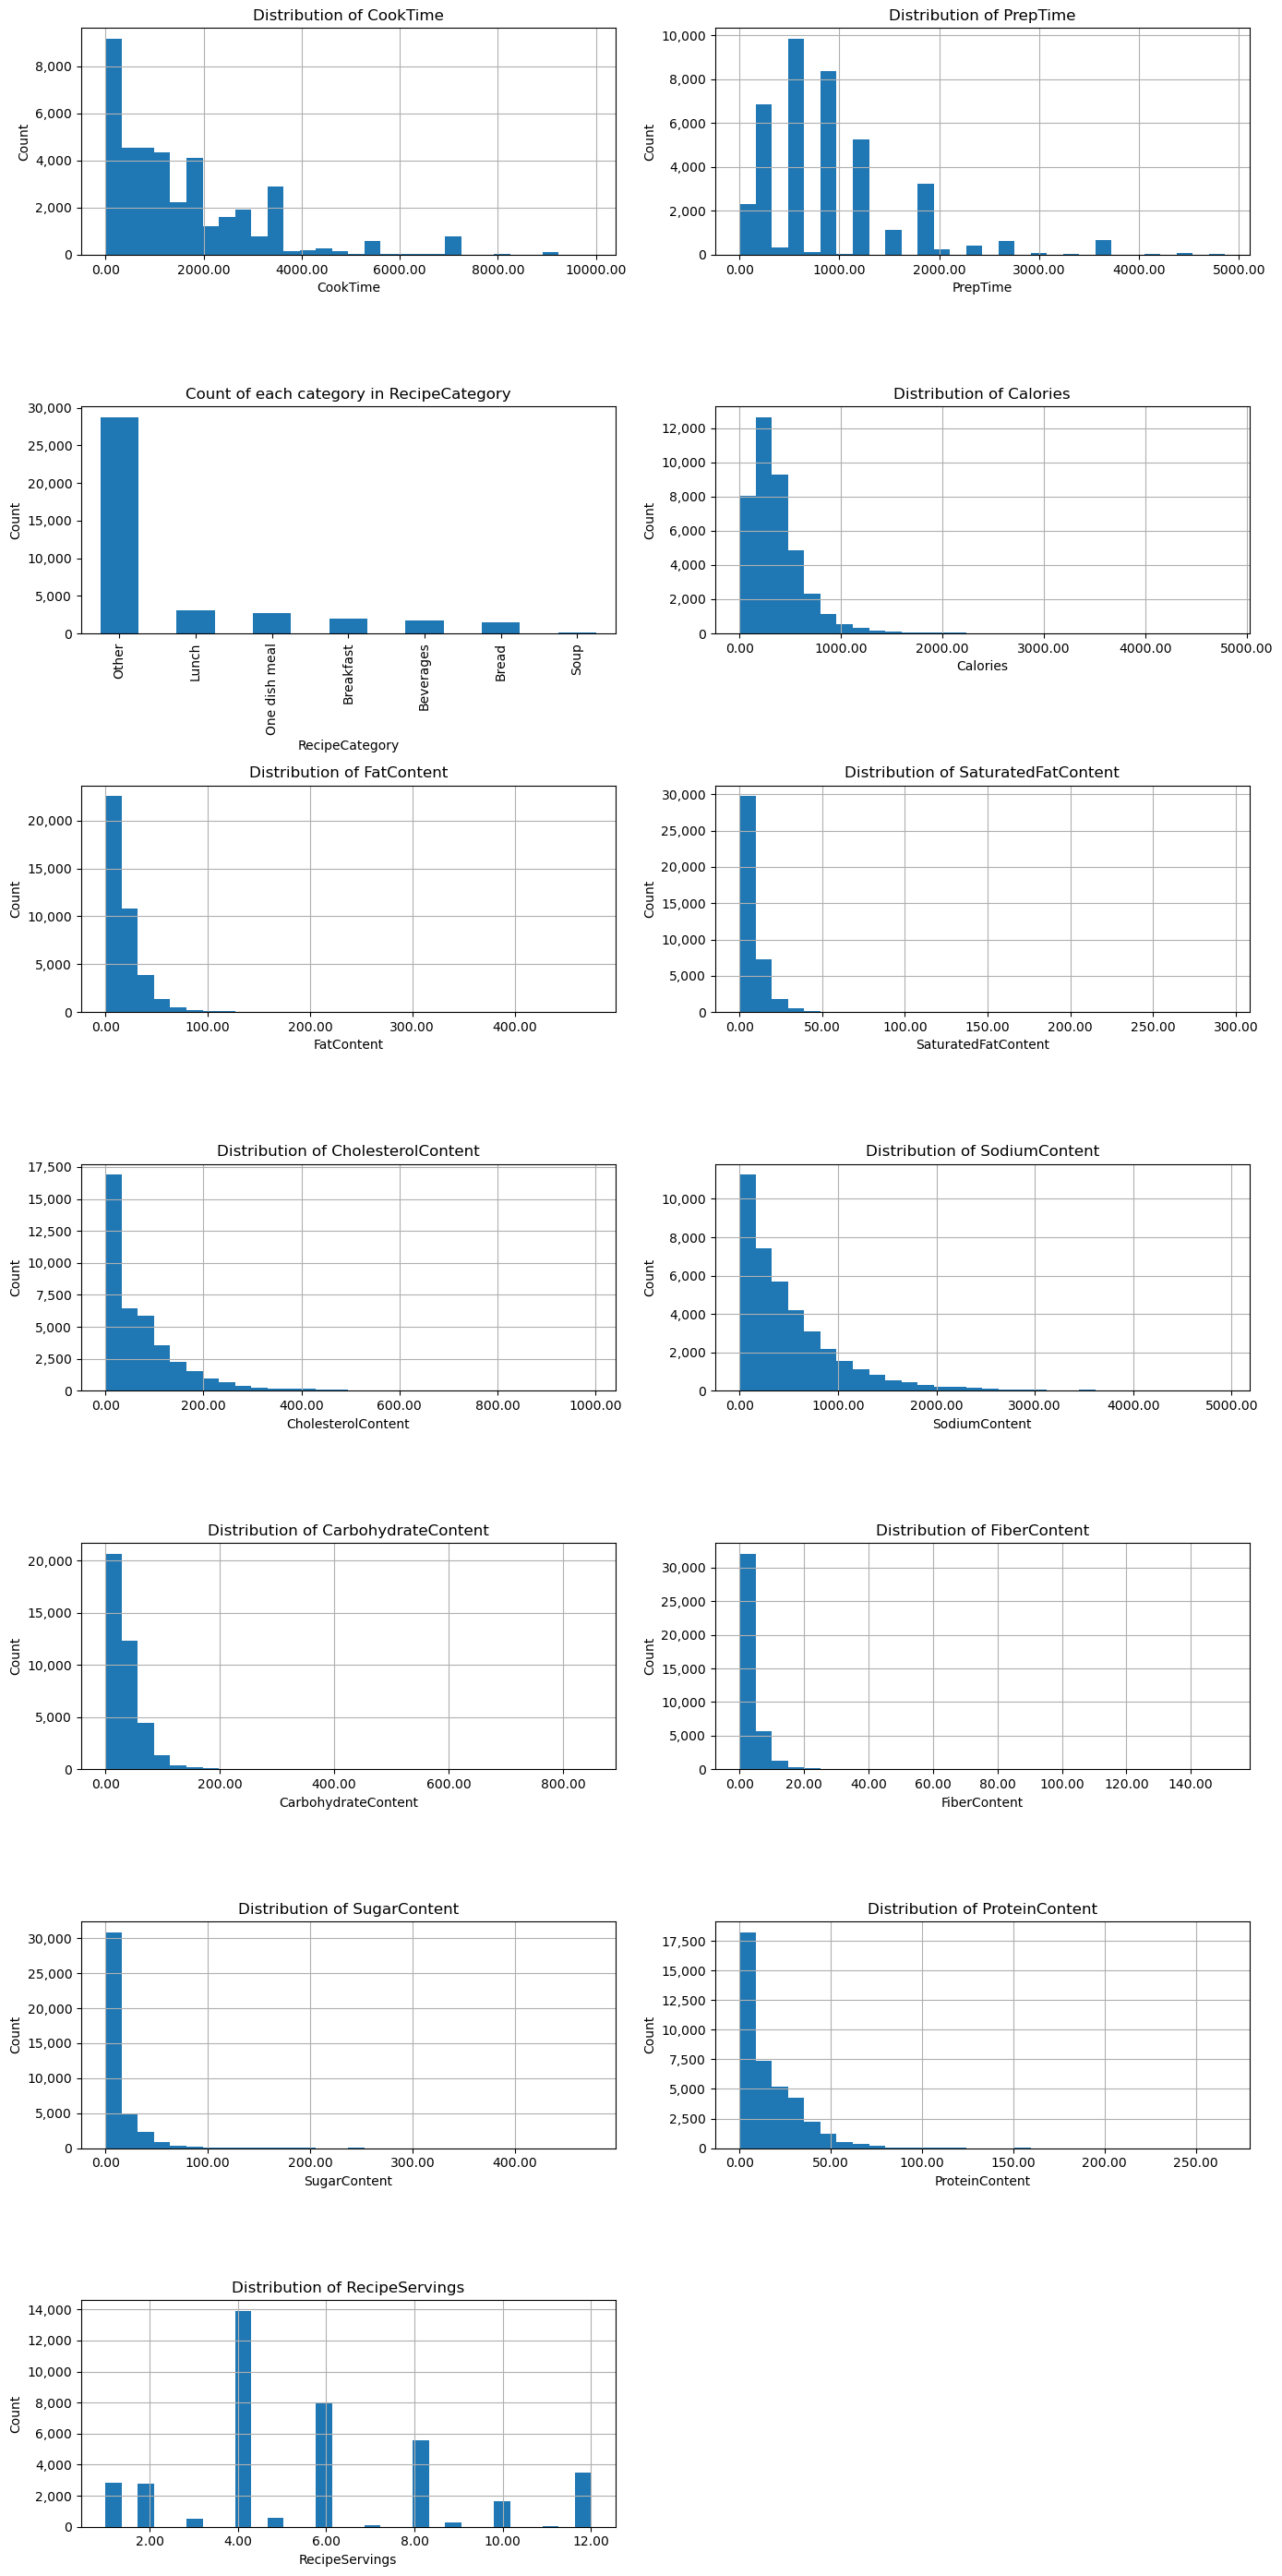

In [34]:
# I will intentionally have very high thresholds because some recipes might include very large meals (e.g. whole turkey) for many portions
thresholds = {
    'CookTime': 10000,
    'PrepTime': 5000,
    'Calories': 5000,
    'FatContent': 500,
    'SaturatedFatContent': 500,
    'CholesterolContent': 1000,
    'SodiumContent': 5000,
    'CarbohydrateContent': 5000,
    'FiberContent': 500,
    'SugarContent': 500,
    'ProteinContent': 500,
    'RecipeServings': 12
}

# Make a copy to avoid changing the original DataFrame
recipes_filtered = recipes.copy()

# Apply thresholds
for col, max_val in thresholds.items():
    recipes_filtered = recipes_filtered[recipes_filtered[col] <= max_val]

# plot the charts again after filtering

fields_to_plot = ['CookTime', 'PrepTime', 'RecipeCategory', 'Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent', 
                  'SodiumContent',  'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent', 'RecipeServings']

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(14, 28))
axes = axes.flatten()

for idx, col in enumerate(fields_to_plot):
    ax = axes[idx]
    if pd.api.types.is_numeric_dtype(recipes_filtered[col]):
        recipes_filtered[col].hist(bins=30, ax=ax)
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
        ax.set_title(f'Distribution of {col}')
        ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
    else:
        recipes_filtered[col].value_counts().plot(kind='bar', ax=ax)
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
        ax.set_title(f'Count of each category in {col}')
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Hide any unused subplots if fields_to_plot < 14
for j in range(len(fields_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Seems like there are some outliers anyway. We will deal will them later, for not I will just note it for now

## TODO:
- Deal with outliers
- Create a meal category based on recipe ingredients
- RecipeServings has a lot of NaN values. Deal with them, or drop the column
- RecipeYield has a lot of NaN values. Deal with them, or drop the column

# 1.3. Reviews

In [22]:
reviews = pd.read_csv("reviews.csv", dtype={"Rating": "float64", "Like": "object", "TestSetId": "float64", "RecipeId": str})
reviews.head(5)

,AuthorId,RecipeId,Rating,Like,TestSetId
0,2492191A,33671,2.00,NaN,1.00
1,2002019979A,92647,2.00,NaN,2.00
2,408594E,161770,NaN,NaN,3.00
3,2001625557E,108231,2.00,NaN,4.00
4,2001427116E,71109,NaN,NaN,5.00


In [23]:
reviews.describe(include='all')

,AuthorId,RecipeId,Rating,Like,TestSetId
count,140195,140195,77108.00,97381,42814.00
unique,49348,75604,NaN,2,NaN
top,1930181E,45809,NaN,FALSE,NaN
freq,853,258,NaN,84503,NaN
mean,NaN,NaN,2.00,NaN,21407.50
std,NaN,NaN,0.00,NaN,12359.48
min,NaN,NaN,2.00,NaN,1.00
25%,NaN,NaN,2.00,NaN,10704.25
50%,NaN,NaN,2.00,NaN,21407.50
75%,NaN,NaN,2.00,NaN,32110.75


In [24]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140195 entries, 0 to 140194
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   AuthorId   140195 non-null  object 
 1   RecipeId   140195 non-null  object 
 2   Rating     77108 non-null   float64
 3   Like       97381 non-null   object 
 4   TestSetId  42814 non-null   float64
dtypes: float64(2), object(3)
memory usage: 5.3+ MB


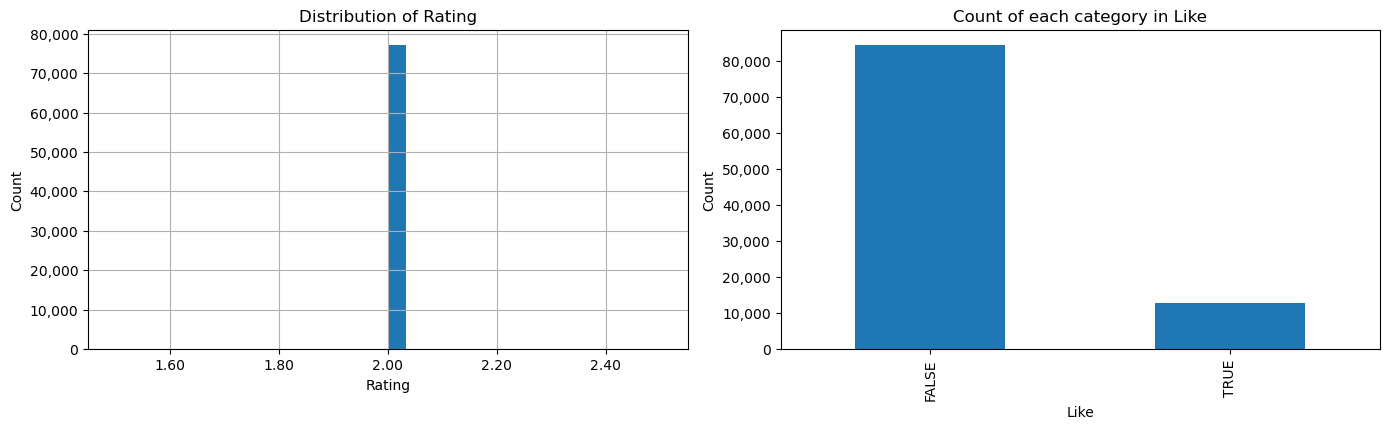

In [25]:
fields_to_plot = ['Rating', 'Like']

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(14, 28))
axes = axes.flatten()

for idx, col in enumerate(fields_to_plot):
    ax = axes[idx]
    if pd.api.types.is_numeric_dtype(reviews[col]):
        reviews[col].hist(bins=30, ax=ax)
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
        ax.set_title(f'Distribution of {col}')
        ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
    else:
        reviews[col].value_counts().plot(kind='bar', ax=ax)
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
        ax.set_title(f'Count of each category in {col}')
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Hide any unused subplots if fields_to_plot < 14
for j in range(len(fields_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [26]:
# checking how many of the recipes have actually been reviewed
recipes_filtered = recipes[recipes['RecipeId'].isin(reviews['RecipeId'])]
recipes_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75604 entries, 0 to 75603
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   RecipeId                    75604 non-null  object 
 1   Name                        75604 non-null  object 
 2   CookTime                    75604 non-null  int64  
 3   PrepTime                    75604 non-null  int64  
 4   RecipeCategory              75604 non-null  object 
 5   RecipeIngredientQuantities  75604 non-null  object 
 6   RecipeIngredientParts       75604 non-null  object 
 7   Calories                    75604 non-null  float64
 8   FatContent                  75604 non-null  float64
 9   SaturatedFatContent         75604 non-null  float64
 10  CholesterolContent          75604 non-null  float64
 11  SodiumContent               75604 non-null  float64
 12  CarbohydrateContent         75604 non-null  float64
 13  FiberContent                756

### TODO: 
- Rating – a lot of missing values. No distribution. Probably can be dropped. But could have some meaning as binary variable.
- Like – convert values into 0 and 1; convert into categorical dtype
- TestSetId – separate the records with values in this column
- Seems like all recipes have been reviewed. We cannot drop the recipes with outlier macro nutrients

# 1.4. Requests 

In [17]:
requests = pd.read_csv("requests.csv")
requests.head(5)

,AuthorId,RecipeId,Time,HighCalories,HighProtein,LowFat,LowSugar,HighFiber
0,2001012259B,73440,1799.95,0.00,Indifferent,0,0,0
1,437641B,365718,4201.82,0.00,Yes,0,Indifferent,1
2,1803340263D,141757,6299.86,0.00,Indifferent,1,Indifferent,0
3,854048B,280351,19801.37,0.00,Yes,1,0,1
4,2277685E,180505,5400.09,0.00,Indifferent,0,0,0


In [18]:
requests.describe(include='all')

,AuthorId,RecipeId,Time,HighCalories,HighProtein,LowFat,LowSugar,HighFiber
count,140195,140195.00,140195.00,140195.00,140195,140195.00,140195,140195.00
unique,49348,NaN,NaN,NaN,2,NaN,2,NaN
top,1930181E,NaN,NaN,NaN,Indifferent,NaN,0,NaN
freq,853,NaN,NaN,NaN,84244,NaN,98113,NaN
mean,NaN,152770.64,8435.68,0.40,NaN,0.30,NaN,0.40
std,NaN,130325.80,132778.59,0.49,NaN,0.46,NaN,0.49
min,NaN,40.00,-2.61,0.00,NaN,0.00,NaN,0.00
25%,NaN,47111.00,1201.48,0.00,NaN,0.00,NaN,0.00
50%,NaN,109423.00,2399.82,0.00,NaN,0.00,NaN,0.00
75%,NaN,232075.00,4199.63,1.00,NaN,1.00,NaN,1.00


In [19]:
requests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140195 entries, 0 to 140194
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   AuthorId      140195 non-null  object 
 1   RecipeId      140195 non-null  int64  
 2   Time          140195 non-null  float64
 3   HighCalories  140195 non-null  float64
 4   HighProtein   140195 non-null  object 
 5   LowFat        140195 non-null  int64  
 6   LowSugar      140195 non-null  object 
 7   HighFiber     140195 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 8.6+ MB


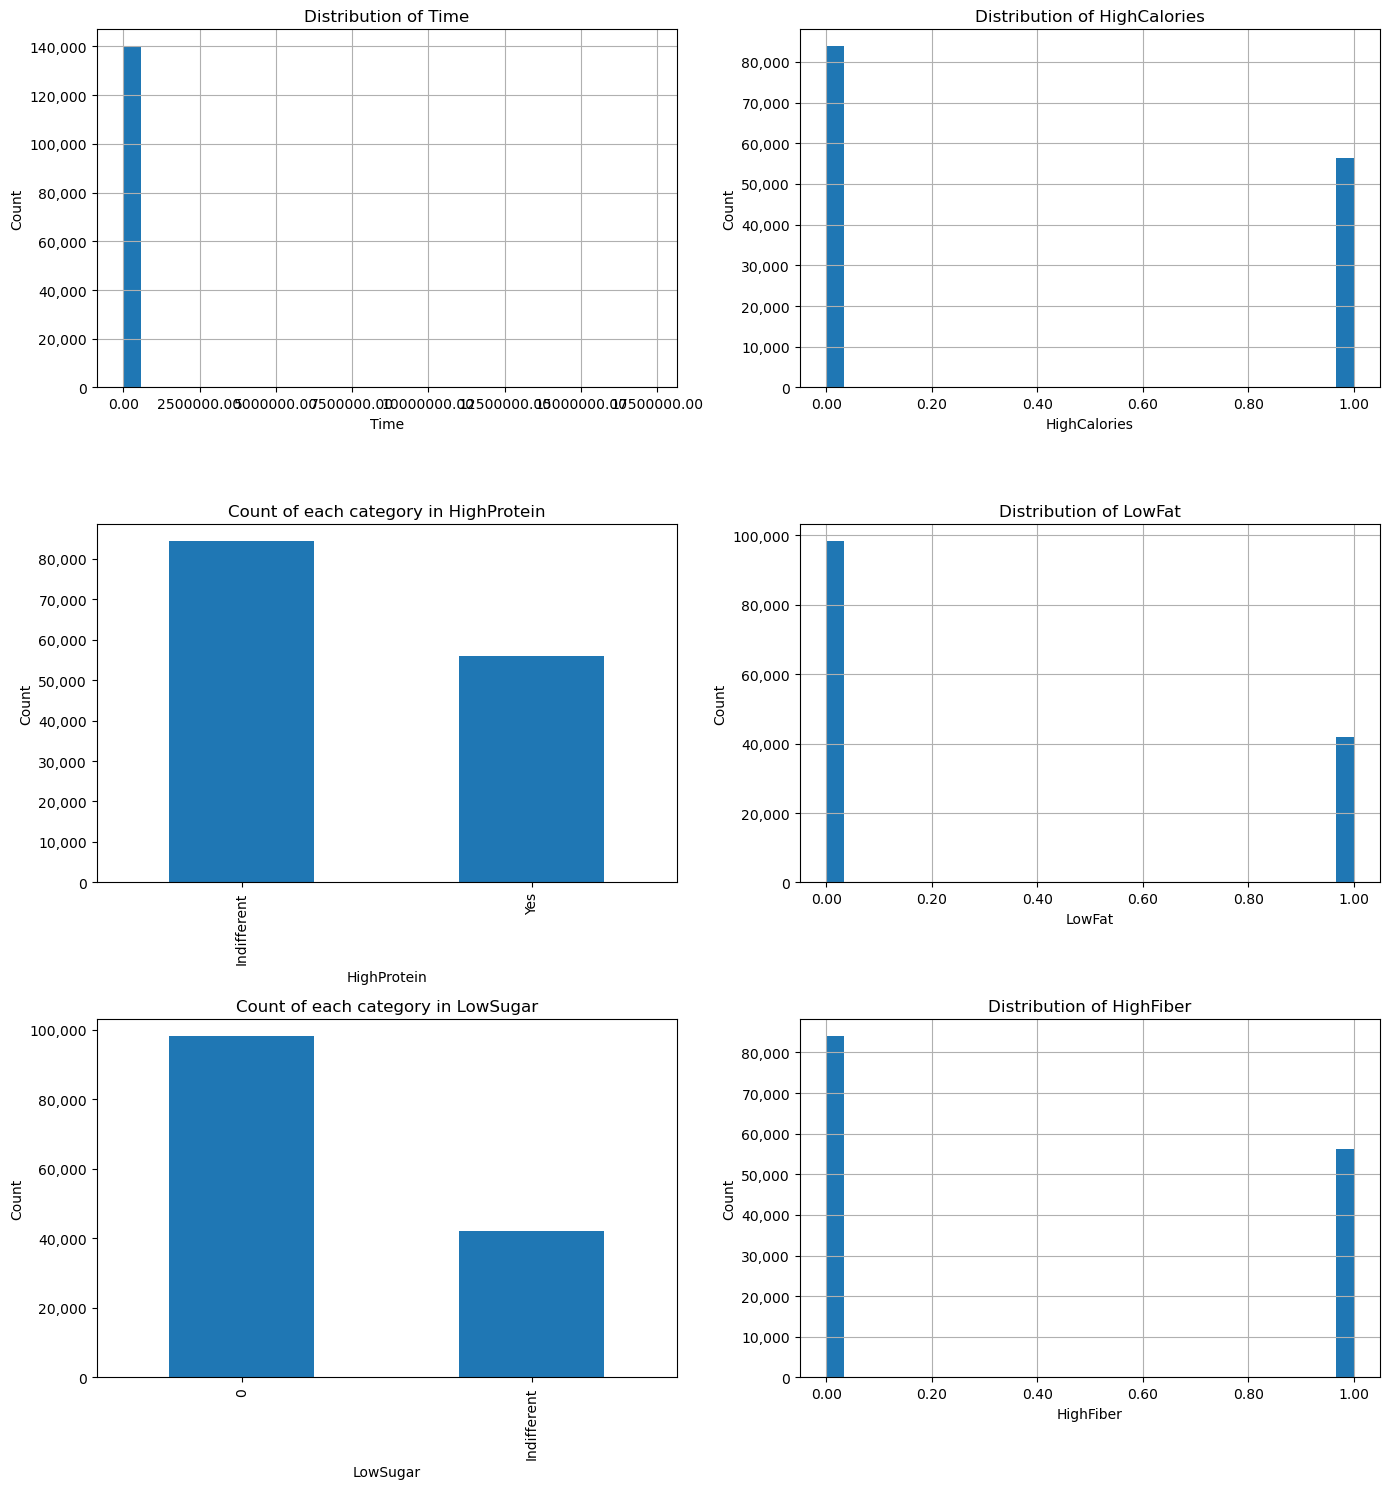

In [20]:
fields_to_plot = ['Time', 'HighCalories', 'HighProtein', 'LowFat', 'LowSugar', 'HighFiber']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 15))
axes = axes.flatten()

for idx, col in enumerate(fields_to_plot):
    ax = axes[idx]
    if pd.api.types.is_numeric_dtype(requests[col]):
        requests[col].hist(bins=30, ax=ax)
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
        ax.set_title(f'Distribution of {col}')
        ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
    else:
        requests[col].value_counts().plot(kind='bar', ax=ax)
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
        ax.set_title(f'Count of each category in {col}')
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Hide any unused subplots if fields_to_plot < 14
for j in range(len(fields_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### TODO:
- Time – deal with outliers 
- HighCalories: convert into categorical dtype 
- HighProtein: convert values into 0 and 1; convert into categorical dtype 
- LowFat: convert into categorical dtype 
- LowSugar: convert values into 0 and 1; convert into categorical dtype
- HighFiber: convert into categorical dtype 

# 2 Separate mdf preprocessing

## Diet

In [21]:
# Drop row with NaN authorID 
df_diet = df_diet.dropna()

NameError: name 'df_diet' is not defined

In [ ]:
# Kategorisieren Sie das Alter in Altersgruppen
bins = [0, 20, 30, 40, 50, 60, 70, 80, float('inf')]
labels = [20, 30, 40, 50, 60, 70, 80, 90]
df_diet['Age_Group'] = pd.cut(df_diet['Age'], bins=bins, labels=labels, right=False)
df_diet

,AuthorId,Diet,Age,Age_Group
0,10000120E,Vegetarian,46,50
1,1000014D,Vegan,18,20
2,1000015A,Vegetarian,58,60
3,1000016E,Vegetarian,32,40
4,1000027E,Vegan,61,70
...,...,...,...,...
271902,999917E,Vegetarian,28,30
271903,999936C,Omnivore,22,30
271904,99993D,Vegetarian,58,60
271905,99994A,Vegetarian,18,20


## Recipes mdf

partially not used anymore as it takes too long, but it works

idea: 
- add more info on recipes and how many have something in common
- do some bucketing on certain information to get the rest running

### Turned to markdown to not show
#get all ingredients as separate columns that is either zero if not existing or the correspoding value
from fractions import Fraction

def convert_to_float(value):
    """Function to convert a string to a float, handling fractions"""
    if "-" in value:
        first_quant, second_quant = value.split('-') 
        return (convert_to_float(first_quant.strip()) + convert_to_float(second_quant.strip())) / 2
    else:
        try:
            # Try converting the value directly to a float
            return float(value)
        except ValueError:
            try:
                # Try converting the value to a fraction
                return float(Fraction(value))
            except ValueError:
                # If the value is a mixed number, convert it to a float
                try: 
                    # print(value)
                    whole_part, fraction_part = value.strip().split(' ')
                    return float(whole_part) + float(Fraction(fraction_part))
                except ValueError:
                    print("---- ERROR. ", value)

#get all unique ingredients to build features from that
unique_parts = ['Dijon mustard', 'skinless chicken thighs', 'cilantro leaf', 'cucumber', 'fresh mushrooms', 'plain low-fat yogurt', 'lemon zest', 'cheese', 'yukon gold potatoes', 'cherries', 'avocados', 'white sugar', 'apples', 'graham crackers', 'pepper', 'ground turmeric', 'reduced sodium soy sauce', 'frozen hash browns', 'eggplants', 'fresh lime juice', 'salmon fillet', 'chicken', 'farfalle pasta', 'apple cider vinegar', 'creme fraiche', 'rum', 'eggplant', 'herb stuffing mix', 'nonfat milk', 'green onions', 'dark red kidney beans', 'cake flour', 'fresh garlic', 'hazelnuts', 'shrimp', 'yellow onions', 'hard alcoholic cider', 'leeks', 'chipotle chiles', 'cocoa powder', 'macaroni', 'cheddar cheese', 'dried thyme', 'vegetable shortening', 'garlic', 'wine vinegar', 'fresh parsley', 'inger ale', 'carrots', 'green beans', 'green chilies', 'garlic cloves', 'green pepper', 'green cabbage', 'chili powder', 'lemons, zest of', 'warm water', 'Accent seasoning', 'baking powder', 'raw cashews', 'capers', 'fresh strawberries', 'daikon radish', 'lamb chops', 'frozen corn', 'baking potatoes', 'pure maple syrup', 'chorizo sausage', 'quick-cooking oats', 'barbecue sauce', 'basil', 'seasoning salt', 'white chocolate chips', 'vanilla extract', 'sea salt', 'pasta', 'red wine vinegar', 'bacon', 'evaporated milk', 'ground beef', 'oregano', 'rice vinegar', 'cherry brandy', 'shallot', 'plain gelatin', 'Miracle Whip', 'Velveeta cheese', 'phyllo pastry', 'brown lentils', 'fat-free cottage cheese', 'dried parsley', 'reduced-fat alfredo sauce', 'chutney', 'pimientos', 'mustard', 'onion', 'fresh lemongrass', 'chocolate ice cream', 'light butter', 'vegetarian refried beans', 'gruyere cheese', 'parma ham', 'low sodium soy sauce', 'coarse salt', 'baby shrimp', 'lemon pepper', 'burrito-size flour tortillas', 'unsalted cashews', 'sesame seeds', 'ground black pepper', 'coconut oil', 'dry mustard', 'sweet onion', 'fresh cilantro', 'soy sauce', 'alf-and-half', 'hard-boiled egg', 'tortilla chips', 'canned pumpkin puree', 'sour cream', 'sweetened condensed milk', 'lean ground beef', 'plain flour', 'egg', 'ground coriander', 'sweet paprika', 'penne pasta', 'fresh blueberries', 'green onion', 'dark Creme de Cacao', 'chicken breasts', 'Heinz ketchup', 'crushed tomatoes', 'sweet potatoes', 'pecans', 'yellow rice', 'boneless chicken breast', 'ground cumin', 'French vanilla instant pudding', 'cornflour', 'tomato juice', 'shortening', 'garlic clove', 'zucchini', 'vegetable broth', 'rice', 'unsalted butter', "confectioners' sugar", 'broccoli', 'ground cloves', 'Thai fish sauce', 'dried rosemary', 'mayonnaise', 'turkey', 'sherry wine', 'garam masala', 'tuna', 'Cool Whip', 'chili beans', 'pine nuts', 'fresh rosemary', 'reduced-fat sour cream', 'bell pepper', 'lime juice', 'chicken bouillon granules', 'white kidney beans', 'active dry yeast', 'lemon twists', 'vanilla pudding mix', 'lean bacon', 'dried oregano', 'chicken bouillon cubes', 'tomato puree', 'hot red chili peppers', 'strawberries', 'kiwi fruit', 'granulated sugar', 'black beans', 'thick slab bacon', 'fresh ground black pepper', 'light chunk tuna in water', 'sambal oelek', 'hard-boiled eggs', 'vanilla', 'ground ginger', 'chickpea flour', 'paprika', 'dry sherry', 'frozen chopped spinach', 'parsnips', 'fresh thyme', 'fresh raspberries', 'raisins', 'jellied cranberry sauce', 'extra virgin olive oil', 'chicken-flavored vegetarian seasoning', 'lemon peel', 'lemon, rind of', 'pure vanilla extract', 'fresh ginger', 'sharp cheddar cheese', 'ginger', 'whole black peppercorns', 'frozen baby peas', 'light mayonnaise', 'fat-free mayonnaise', 'chocolate-covered coffee beans', 'fresh tomatoes', 'light brown sugar', 'Tabasco sauce', 'garlic powder', 'wheat germ', 'canola oil', 'lime twist', 'Malibu rum', 'self-raising flour', 'lemon juice', 'green bell pepper', 'shallots', 'cinnamon', 'beef broth', 'elbow macaroni', 'brown sugar', 'whole tomatoes', 'dry white wine', 'sunflower seeds', 'mixed spice', 'cayenne pepper', 'spinach', 'dill', 'onion powder', 'bay leaves', 'white wine vinegar', 'lime zest', 'whole wheat flour', 'butter', 'ham', 'cumin', 'nutmeg', 'chicken breast fillets', 'kosher salt', 'molasses', 'onions', 'msg', 'dill weed', 'fresh lemon juice', 'vanilla bean', 'ketchup', 'frozen corn kernels', 'diced green chilies', 'hoisin sauce', 'mushrooms', 'celery rib', 'buttermilk', 'dried basil', 'powdered sugar', 'parmesan cheese', 'icing sugar', 'chicken broth', 'salt', 'long grain rice', 'cornstarch', 'broccoli florets', 'Italian tomatoes', 'tomato sauce', 'walnuts', 'cream cheese', 'margarine', 'coconut milk', 'prosciutto', 'pickles', 'sausages', 'coconut flakes', 'unflavored gelatin', 'bacon bits', 'red onion', 'tarragon', 'Worcestershire sauce', 'heavy whipping cream', 'great northern beans', 'coconut', 'milk', 'red bell pepper', 'dates', 'red bell peppers', 'mint', 'bananas', 'swiss cheese', 'boneless skinless chicken breast', 'boneless skinless chicken breast halves', 'roasting chickens', 'ground cinnamon', 'sweet onions', 'maple syrup', 'chickpeas', 'fettuccine', 'mint leaf', 'carrot', 'fresh parsley leaves', 'cabbage', 'Copycat Taco Bell Seasoned Beef', '2% buttermilk', 'white vinegar', 'flour', 'sweet potato', 'baking soda', 'crushed pineapple', 'diced pimentos', 'diced tomatoes', 'orange marmalade', 'flaked coconut', 'unbleached flour', 'honey', 'plain yogurt', 'fresh basil', 'vodka', 'pumpkin pie spice', 'navy beans', 'boiling water', 'mozzarella cheese', 'Amarula cream liqueur', 'sugar', 'tomatoes', 'pork sausage', 'heavy cream', 'olive oil', 'black pepper', 'cooked pork', 'cottage cheese', 'oyster sauce', 'fresh asparagus', 'celery seed', 'white button mushrooms', 'medium-dry sherry', 'water', 'lettuce', 'navel orange', 'allspice', 'dried cranberries', 'cold water', 'eggs', 'provolone cheese', 'soymilk', 'parsley', 'celery', 'all-purpose flour', 'radishes', 'vinegar', 'low-fat yogurt', 'peanut butter', 'caster sugar', 'corn', 'ricotta cheese', 'parsley flakes', 'potatoes', 'asparagus spears', 'fig', 'pumpkin', 'dried oregano leaves', 'Spanish rice', 'white pepper', 'yellow onion', 'butter lettuce leaf', 'lemons', 'tomato paste', 'camembert cheese', 'frozen french fries']

for parts, quants in zip(df_recipes['RecipeIngredientParts'], df_recipes['RecipeIngredientQuantities']):
    # Remove 'c(' and ')' from the string and split by ","
    parts_list = parts[2:-1].split('", "')
    # Strip unnecessary symbols from each element in the list
    parts_list = [ingredient.strip('"\\"') for ingredient in parts_list]

    df_recipes["IngredientList"] = parts_list

    # unique_parts = list(set(unique_parts).union(parts_list))  # how list unique_parts (see above) was created, but not required anymore

    quants_list = quants[2:-1].split('", "')
    # print(quants_list)
    quant_list = []
    for ingredient in quants_list:
        if ' -2' in quants_list:  # quick fix to get everything running
            result = 2
        else:
            result = convert_to_float(ingredient.strip('"\\"'))
        quant_list.append(result)

    # ing_dict_per_recipe = 

    #recipe_ingredients_total = {key: 0 for key in unique_parts}
    #for part, quantity in dict(zip(parts_list, quant_list)):
        #recipe_ingredients_total[part] = quantity

    #print(recipe_ingredients_total)



In [ ]:
def get_ingredient_list(parts):
    # Remove 'c(' and ')' from the string and split by ","
    parts_list = parts[2:-1].split('", "')
    # Strip unnecessary symbols from each element in the list
    parts_list = [ingredient.strip('"\\"') for ingredient in parts_list]
    
    return parts_list

# Function to add
def get_ing_list(row):
    return get_ingredient_list(row['RecipeIngredientParts'])

# create new column of an actual list
df_recipes["IngredientList"] = df_recipes.apply(get_ing_list, axis=1)

In [ ]:
unique_parts = ['Dijon mustard', 'skinless chicken thighs', 'cilantro leaf', 'cucumber', 'fresh mushrooms', 'plain low-fat yogurt', 'lemon zest', 'cheese', 'yukon gold potatoes', 'cherries', 'avocados', 'white sugar', 'apples', 'graham crackers', 'pepper', 'ground turmeric', 'reduced sodium soy sauce', 'frozen hash browns', 'eggplants', 'fresh lime juice', 'salmon fillet', 'chicken', 'farfalle pasta', 'apple cider vinegar', 'creme fraiche', 'rum', 'eggplant', 'herb stuffing mix', 'nonfat milk', 'green onions', 'dark red kidney beans', 'cake flour', 'fresh garlic', 'hazelnuts', 'shrimp', 'yellow onions', 'hard alcoholic cider', 'leeks', 'chipotle chiles', 'cocoa powder', 'macaroni', 'cheddar cheese', 'dried thyme', 'vegetable shortening', 'garlic', 'wine vinegar', 'fresh parsley', 'inger ale', 'carrots', 'green beans', 'green chilies', 'garlic cloves', 'green pepper', 'green cabbage', 'chili powder', 'lemons, zest of', 'warm water', 'Accent seasoning', 'baking powder', 'raw cashews', 'capers', 'fresh strawberries', 'daikon radish', 'lamb chops', 'frozen corn', 'baking potatoes', 'pure maple syrup', 'chorizo sausage', 'quick-cooking oats', 'barbecue sauce', 'basil', 'seasoning salt', 'white chocolate chips', 'vanilla extract', 'sea salt', 'pasta', 'red wine vinegar', 'bacon', 'evaporated milk', 'ground beef', 'oregano', 'rice vinegar', 'cherry brandy', 'shallot', 'plain gelatin', 'Miracle Whip', 'Velveeta cheese', 'phyllo pastry', 'brown lentils', 'fat-free cottage cheese', 'dried parsley', 'reduced-fat alfredo sauce', 'chutney', 'pimientos', 'mustard', 'onion', 'fresh lemongrass', 'chocolate ice cream', 'light butter', 'vegetarian refried beans', 'gruyere cheese', 'parma ham', 'low sodium soy sauce', 'coarse salt', 'baby shrimp', 'lemon pepper', 'burrito-size flour tortillas', 'unsalted cashews', 'sesame seeds', 'ground black pepper', 'coconut oil', 'dry mustard', 'sweet onion', 'fresh cilantro', 'soy sauce', 'alf-and-half', 'hard-boiled egg', 'tortilla chips', 'canned pumpkin puree', 'sour cream', 'sweetened condensed milk', 'lean ground beef', 'plain flour', 'egg', 'ground coriander', 'sweet paprika', 'penne pasta', 'fresh blueberries', 'green onion', 'dark Creme de Cacao', 'chicken breasts', 'Heinz ketchup', 'crushed tomatoes', 'sweet potatoes', 'pecans', 'yellow rice', 'boneless chicken breast', 'ground cumin', 'French vanilla instant pudding', 'cornflour', 'tomato juice', 'shortening', 'garlic clove', 'zucchini', 'vegetable broth', 'rice', 'unsalted butter', "confectioners' sugar", 'broccoli', 'ground cloves', 'Thai fish sauce', 'dried rosemary', 'mayonnaise', 'turkey', 'sherry wine', 'garam masala', 'tuna', 'Cool Whip', 'chili beans', 'pine nuts', 'fresh rosemary', 'reduced-fat sour cream', 'bell pepper', 'lime juice', 'chicken bouillon granules', 'white kidney beans', 'active dry yeast', 'lemon twists', 'vanilla pudding mix', 'lean bacon', 'dried oregano', 'chicken bouillon cubes', 'tomato puree', 'hot red chili peppers', 'strawberries', 'kiwi fruit', 'granulated sugar', 'black beans', 'thick slab bacon', 'fresh ground black pepper', 'light chunk tuna in water', 'sambal oelek', 'hard-boiled eggs', 'vanilla', 'ground ginger', 'chickpea flour', 'paprika', 'dry sherry', 'frozen chopped spinach', 'parsnips', 'fresh thyme', 'fresh raspberries', 'raisins', 'jellied cranberry sauce', 'extra virgin olive oil', 'chicken-flavored vegetarian seasoning', 'lemon peel', 'lemon, rind of', 'pure vanilla extract', 'fresh ginger', 'sharp cheddar cheese', 'ginger', 'whole black peppercorns', 'frozen baby peas', 'light mayonnaise', 'fat-free mayonnaise', 'chocolate-covered coffee beans', 'fresh tomatoes', 'light brown sugar', 'Tabasco sauce', 'garlic powder', 'wheat germ', 'canola oil', 'lime twist', 'Malibu rum', 'self-raising flour', 'lemon juice', 'green bell pepper', 'shallots', 'cinnamon', 'beef broth', 'elbow macaroni', 'brown sugar', 'whole tomatoes', 'dry white wine', 'sunflower seeds', 'mixed spice', 'cayenne pepper', 'spinach', 'dill', 'onion powder', 'bay leaves', 'white wine vinegar', 'lime zest', 'whole wheat flour', 'butter', 'ham', 'cumin', 'nutmeg', 'chicken breast fillets', 'kosher salt', 'molasses', 'onions', 'msg', 'dill weed', 'fresh lemon juice', 'vanilla bean', 'ketchup', 'frozen corn kernels', 'diced green chilies', 'hoisin sauce', 'mushrooms', 'celery rib', 'buttermilk', 'dried basil', 'powdered sugar', 'parmesan cheese', 'icing sugar', 'chicken broth', 'salt', 'long grain rice', 'cornstarch', 'broccoli florets', 'Italian tomatoes', 'tomato sauce', 'walnuts', 'cream cheese', 'margarine', 'coconut milk', 'prosciutto', 'pickles', 'sausages', 'coconut flakes', 'unflavored gelatin', 'bacon bits', 'red onion', 'tarragon', 'Worcestershire sauce', 'heavy whipping cream', 'great northern beans', 'coconut', 'milk', 'red bell pepper', 'dates', 'red bell peppers', 'mint', 'bananas', 'swiss cheese', 'boneless skinless chicken breast', 'boneless skinless chicken breast halves', 'roasting chickens', 'ground cinnamon', 'sweet onions', 'maple syrup', 'chickpeas', 'fettuccine', 'mint leaf', 'carrot', 'fresh parsley leaves', 'cabbage', 'Copycat Taco Bell Seasoned Beef', '2% buttermilk', 'white vinegar', 'flour', 'sweet potato', 'baking soda', 'crushed pineapple', 'diced pimentos', 'diced tomatoes', 'orange marmalade', 'flaked coconut', 'unbleached flour', 'honey', 'plain yogurt', 'fresh basil', 'vodka', 'pumpkin pie spice', 'navy beans', 'boiling water', 'mozzarella cheese', 'Amarula cream liqueur', 'sugar', 'tomatoes', 'pork sausage', 'heavy cream', 'olive oil', 'black pepper', 'cooked pork', 'cottage cheese', 'oyster sauce', 'fresh asparagus', 'celery seed', 'white button mushrooms', 'medium-dry sherry', 'water', 'lettuce', 'navel orange', 'allspice', 'dried cranberries', 'cold water', 'eggs', 'provolone cheese', 'soymilk', 'parsley', 'celery', 'all-purpose flour', 'radishes', 'vinegar', 'low-fat yogurt', 'peanut butter', 'caster sugar', 'corn', 'ricotta cheese', 'parsley flakes', 'potatoes', 'asparagus spears', 'fig', 'pumpkin', 'dried oregano leaves', 'Spanish rice', 'white pepper', 'yellow onion', 'butter lettuce leaf', 'lemons', 'tomato paste', 'camembert cheese', 'frozen french fries']

1. minimal information that we need to get from this is whether the different recipes are vegeterian, vegan or something else
2. we need a good idea to group these ingredient because an additional 367 features per recipe might be a little too much and our model could probably not learn from that either


## DO NOT START THE CODE BELOW IF YOU DO NOT WANT TO START THE PROCESS AGAIN")

### Turned to markdown to hide
import ipywidgets as widgets
from IPython.display import display

#Example list
ingredients_list = ['Dijon mustard', 'skinless chicken thighs', 'cilantro leaf', 'cucumber', 'fresh mushrooms', 'plain low-fat yogurt', 'lemon zest', 'cheese', 'yukon gold potatoes', 'cherries', 'avocados', 'white sugar', 'apples', 'graham crackers', 'pepper', 'ground turmeric', 'reduced sodium soy sauce', 'frozen hash browns', 'eggplants', 'fresh lime juice', 'salmon fillet', 'chicken', 'farfalle pasta', 'apple cider vinegar', 'creme fraiche', 'rum', 'eggplant', 'herb stuffing mix', 'nonfat milk', 'green onions', 'dark red kidney beans', 'cake flour', 'fresh garlic', 'hazelnuts', 'shrimp', 'yellow onions', 'hard alcoholic cider', 'leeks', 'chipotle chiles', 'cocoa powder', 'macaroni', 'cheddar cheese', 'dried thyme', 'vegetable shortening', 'garlic', 'wine vinegar', 'fresh parsley', 'inger ale', 'carrots', 'green beans', 'green chilies', 'garlic cloves', 'green pepper', 'green cabbage', 'chili powder', 'lemons, zest of', 'warm water', 'Accent seasoning', 'baking powder', 'raw cashews', 'capers', 'fresh strawberries', 'daikon radish', 'lamb chops', 'frozen corn', 'baking potatoes', 'pure maple syrup', 'chorizo sausage', 'quick-cooking oats', 'barbecue sauce', 'basil', 'seasoning salt', 'white chocolate chips', 'vanilla extract', 'sea salt', 'pasta', 'red wine vinegar', 'bacon', 'evaporated milk', 'ground beef', 'oregano', 'rice vinegar', 'cherry brandy', 'shallot', 'plain gelatin', 'Miracle Whip', 'Velveeta cheese', 'phyllo pastry', 'brown lentils', 'fat-free cottage cheese', 'dried parsley', 'reduced-fat alfredo sauce', 'chutney', 'pimientos', 'mustard', 'onion', 'fresh lemongrass', 'chocolate ice cream', 'light butter', 'vegetarian refried beans', 'gruyere cheese', 'parma ham', 'low sodium soy sauce', 'coarse salt', 'baby shrimp', 'lemon pepper', 'burrito-size flour tortillas', 'unsalted cashews', 'sesame seeds', 'ground black pepper', 'coconut oil', 'dry mustard', 'sweet onion', 'fresh cilantro', 'soy sauce', 'alf-and-half', 'hard-boiled egg', 'tortilla chips', 'canned pumpkin puree', 'sour cream', 'sweetened condensed milk', 'lean ground beef', 'plain flour', 'egg', 'ground coriander', 'sweet paprika', 'penne pasta', 'fresh blueberries', 'green onion', 'dark Creme de Cacao', 'chicken breasts', 'Heinz ketchup', 'crushed tomatoes', 'sweet potatoes', 'pecans', 'yellow rice', 'boneless chicken breast', 'ground cumin', 'French vanilla instant pudding', 'cornflour', 'tomato juice', 'shortening', 'garlic clove', 'zucchini', 'vegetable broth', 'rice', 'unsalted butter', "confectioners' sugar", 'broccoli', 'ground cloves', 'Thai fish sauce', 'dried rosemary', 'mayonnaise', 'turkey', 'sherry wine', 'garam masala', 'tuna', 'Cool Whip', 'chili beans', 'pine nuts', 'fresh rosemary', 'reduced-fat sour cream', 'bell pepper', 'lime juice', 'chicken bouillon granules', 'white kidney beans', 'active dry yeast', 'lemon twists', 'vanilla pudding mix', 'lean bacon', 'dried oregano', 'chicken bouillon cubes', 'tomato puree', 'hot red chili peppers', 'strawberries', 'kiwi fruit', 'granulated sugar', 'black beans', 'thick slab bacon', 'fresh ground black pepper', 'light chunk tuna in water', 'sambal oelek', 'hard-boiled eggs', 'vanilla', 'ground ginger', 'chickpea flour', 'paprika', 'dry sherry', 'frozen chopped spinach', 'parsnips', 'fresh thyme', 'fresh raspberries', 'raisins', 'jellied cranberry sauce', 'extra virgin olive oil', 'chicken-flavored vegetarian seasoning', 'lemon peel', 'lemon, rind of', 'pure vanilla extract', 'fresh ginger', 'sharp cheddar cheese', 'ginger', 'whole black peppercorns', 'frozen baby peas', 'light mayonnaise', 'fat-free mayonnaise', 'chocolate-covered coffee beans', 'fresh tomatoes', 'light brown sugar', 'Tabasco sauce', 'garlic powder', 'wheat germ', 'canola oil', 'lime twist', 'Malibu rum', 'self-raising flour', 'lemon juice', 'green bell pepper', 'shallots', 'cinnamon', 'beef broth', 'elbow macaroni', 'brown sugar', 'whole tomatoes', 'dry white wine', 'sunflower seeds', 'mixed spice', 'cayenne pepper', 'spinach', 'dill', 'onion powder', 'bay leaves', 'white wine vinegar', 'lime zest', 'whole wheat flour', 'butter', 'ham', 'cumin', 'nutmeg', 'chicken breast fillets', 'kosher salt', 'molasses', 'onions', 'msg', 'dill weed', 'fresh lemon juice', 'vanilla bean', 'ketchup', 'frozen corn kernels', 'diced green chilies', 'hoisin sauce', 'mushrooms', 'celery rib', 'buttermilk', 'dried basil', 'powdered sugar', 'parmesan cheese', 'icing sugar', 'chicken broth', 'salt', 'long grain rice', 'cornstarch', 'broccoli florets', 'Italian tomatoes', 'tomato sauce', 'walnuts', 'cream cheese', 'margarine', 'coconut milk', 'prosciutto', 'pickles', 'sausages', 'coconut flakes', 'unflavored gelatin', 'bacon bits', 'red onion', 'tarragon', 'Worcestershire sauce', 'heavy whipping cream', 'great northern beans', 'coconut', 'milk', 'red bell pepper', 'dates', 'red bell peppers', 'mint', 'bananas', 'swiss cheese', 'boneless skinless chicken breast', 'boneless skinless chicken breast halves', 'roasting chickens', 'ground cinnamon', 'sweet onions', 'maple syrup', 'chickpeas', 'fettuccine', 'mint leaf', 'carrot', 'fresh parsley leaves', 'cabbage', 'Copycat Taco Bell Seasoned Beef', '2% buttermilk', 'white vinegar', 'flour', 'sweet potato', 'baking soda', 'crushed pineapple', 'diced pimentos', 'diced tomatoes', 'orange marmalade', 'flaked coconut', 'unbleached flour', 'honey', 'plain yogurt', 'fresh basil', 'vodka', 'pumpkin pie spice', 'navy beans', 'boiling water', 'mozzarella cheese', 'Amarula cream liqueur', 'sugar', 'tomatoes', 'pork sausage', 'heavy cream', 'olive oil', 'black pepper', 'cooked pork', 'cottage cheese', 'oyster sauce', 'fresh asparagus', 'celery seed', 'white button mushrooms', 'medium-dry sherry', 'water', 'lettuce', 'navel orange', 'allspice', 'dried cranberries', 'cold water', 'eggs', 'provolone cheese', 'soymilk', 'parsley', 'celery', 'all-purpose flour', 'radishes', 'vinegar', 'low-fat yogurt', 'peanut butter', 'caster sugar', 'corn', 'ricotta cheese', 'parsley flakes', 'potatoes', 'asparagus spears', 'fig', 'pumpkin', 'dried oregano leaves', 'Spanish rice', 'white pepper', 'yellow onion', 'butter lettuce leaf', 'lemons', 'tomato paste', 'camembert cheese', 'frozen french fries']
#ingredients_list = ['Dijon mustard', 'skinless chicken thighs', 'cilantro leaf', 'cucumber', 'fresh mushrooms']

#Create an empty dictionary to store the selections
input_dict_new = {}

#Function to handle the button click and update its appearance
def handle_button_click(b, ingredient, buttons_row):
    # Reset the appearance of all buttons in the row
    for button in buttons_row:
        button.button_style = 'info'
        button.disabled = False
    
    # Update the appearance of the clicked button
    b.button_style = 'success'
    b.disabled = True
    
    # Update the dictionary with the new value
    input_dict[ingredient] = b.description.lower()

#Create buttons for each row and ingredient
buttons_rows = []
for i, ingredient in enumerate(ingredients_list):
    button_meat = widgets.Button(description='Meat', button_style='info')
    button_fish = widgets.Button(description='Fish', button_style='info')
    button_vegetarian = widgets.Button(description='Vegetarian', button_style='info')
    button_vegan = widgets.Button(description='Vegan', button_style='info')
    
    # Display buttons in a horizontal row
    row = widgets.HBox([widgets.Label(ingredient, style={'padding-left': '10px'}, layout=widgets.Layout(width='300px')), 
                        button_meat, 
                        button_fish, 
                        button_vegetarian, 
                        button_vegan])
    display(row)
    
    # Add buttons to the row list
    buttons_row = [button_meat, button_fish, button_vegetarian, button_vegan]
    buttons_rows.append(buttons_row)
    
    # Add event handlers to the buttons
    button_meat.on_click(lambda b, ingredient=ingredient, buttons_row=buttons_row: handle_button_click(b, ingredient, buttons_row))
    button_fish.on_click(lambda b, ingredient=ingredient, buttons_row=buttons_row: handle_button_click(b, ingredient, buttons_row))
    button_vegetarian.on_click(lambda b, ingredient=ingredient, buttons_row=buttons_row: handle_button_click(b, ingredient, buttons_row))
    button_vegan.on_click(lambda b, ingredient=ingredient, buttons_row=buttons_row: handle_button_click(b, ingredient, buttons_row))

#Wait for user input
print("Please click an option for each ingredient.")

#Display the resulting dictionary
input_dict_new

#### TODO
#### eggplant and eggplants are the same ingredient but are not the same here

In [ ]:
# final result of my personal findings concerining the analysis of the ingredients
input_dict = {'Dijon mustard': 'vegan',
 'skinless chicken thighs': 'meat',
 'cilantro leaf': 'vegan',
 'cucumber': 'vegan',
 'fresh mushrooms': 'vegan',
 'plain low-fat yogurt': 'vegetarian',
 'lemon zest': 'vegan',
 'cheese': 'vegetarian',
 'cherries': 'vegan',
 'yukon gold potatoes': 'vegan',
 'avocados': 'vegan',
 'white sugar': 'vegan',
 'apples': 'vegan',
 'graham crackers': 'vegan',
 'pepper': 'vegan',
 'ground turmeric': 'vegan',
 'reduced sodium soy sauce': 'vegan',
 'frozen hash browns': 'vegan',
 'eggplants': 'vegan',
 'fresh lime juice': 'vegan',
 'salmon fillet': 'fish',
 'chicken': 'meat',
 'farfalle pasta': 'vegan',
 'apple cider vinegar': 'vegan',
 'creme fraiche': 'vegetarian',
 'rum': 'vegan',
 'eggplant': 'vegan',
 'herb stuffing mix': 'vegan',
 'nonfat milk': 'vegetarian',
 'green onions': 'vegan',
 'dark red kidney beans': 'vegan',
 'cake flour': 'vegan',
 'fresh garlic': 'vegan',
 'hazelnuts': 'vegan',
 'shrimp': 'fish',
 'yellow onions': 'vegan',
 'hard alcoholic cider': 'vegan',
 'leeks': 'vegan',
 'chipotle chiles': 'vegan',
 'cocoa powder': 'vegan',
 'macaroni': 'vegan',
 'cheddar cheese': 'vegetarian',
 'dried thyme': 'vegan',
 'vegetable shortening': 'vegan',
 'garlic': 'vegan',
 'wine vinegar': 'vegan',
 'fresh parsley': 'vegan',
 'inger ale': 'vegan',
 'carrots': 'vegan',
 'green beans': 'vegan',
 'green chilies': 'vegan',
 'garlic cloves': 'vegan',
 'green pepper': 'vegan',
 'green cabbage': 'vegan',
 'chili powder': 'vegan',
 'lemons, zest of': 'vegan',
 'warm water': 'vegan',
 'Accent seasoning': 'vegan',
 'baking powder': 'vegan',
 'raw cashews': 'vegan',
 'capers': 'vegan',
 'fresh strawberries': 'vegan',
 'daikon radish': 'vegan',
 'lamb chops': 'meat',
 'frozen corn': 'vegan',
 'baking potatoes': 'vegan',
 'pure maple syrup': 'vegan',
 'chorizo sausage': 'meat',
 'quick-cooking oats': 'vegan',
 'barbecue sauce': 'vegan',
 'basil': 'vegan',
 'seasoning salt': 'vegan',
 'white chocolate chips': 'vegan',
 'vanilla extract': 'vegan',
 'sea salt': 'vegan',
 'pasta': 'vegan',
 'red wine vinegar': 'vegan',
 'bacon': 'meat',
 'evaporated milk': 'vegetarian',
 'ground beef': 'meat',
 'oregano': 'vegan',
 'rice vinegar': 'vegan',
 'cherry brandy': 'vegan',
 'shallot': 'vegan',
 'plain gelatin': 'meat',
 'Miracle Whip': 'vegetarian',
 'Velveeta cheese': 'vegetarian',
 'phyllo pastry': 'vegan',
 'brown lentils': 'vegan',
 'fat-free cottage cheese': 'vegetarian',
 'dried parsley': 'vegan',
 'reduced-fat alfredo sauce': 'vegetarian',
 'chutney': 'vegan',
 'pimientos': 'vegan',
 'mustard': 'vegan',
 'onion': 'vegan',
 'fresh lemongrass': 'vegan',
 'chocolate ice cream': 'vegetarian',
 'light butter': 'vegetarian',
 'vegetarian refried beans': 'vegan',
 'gruyere cheese': 'vegetarian',
 'parma ham': 'meat',
 'low sodium soy sauce': 'vegan',
 'coarse salt': 'vegan',
 'baby shrimp': 'fish',
 'lemon pepper': 'vegan',
 'burrito-size flour tortillas': 'vegan',
 'unsalted cashews': 'vegan',
 'sesame seeds': 'vegan',
 'ground black pepper': 'vegan',
 'coconut oil': 'vegan',
 'dry mustard': 'vegan',
 'sweet onion': 'vegan',
 'fresh cilantro': 'vegan',
 'alf-and-half': 'vegetarian',
 'hard-boiled egg': 'vegetarian',
 'tortilla chips': 'vegan',
 'canned pumpkin puree': 'vegan',
 'sour cream': 'vegetarian',
 'sweetened condensed milk': 'vegetarian',
 'lean ground beef': 'meat',
 'plain flour': 'vegan',
 'egg': 'vegetarian',
 'ground coriander': 'vegan',
 'sweet paprika': 'vegan',
 'penne pasta': 'vegan',
 'fresh blueberries': 'vegan',
 'green onion': 'vegan',
 'dark Creme de Cacao': 'vegan',
 'chicken breasts': 'meat',
 'Heinz ketchup': 'vegan',
 'crushed tomatoes': 'vegan',
 'sweet potatoes': 'vegan',
 'pecans': 'vegan',
 'yellow rice': 'vegan',
 'boneless chicken breast': 'meat',
 'ground cumin': 'vegan',
 'French vanilla instant pudding': 'vegetarian',
 'cornflour': 'vegan',
 'tomato juice': 'vegan',
 'shortening': 'vegetarian',
 'garlic clove': 'vegan',
 'zucchini': 'vegan',
 'vegetable broth': 'vegan',
 'rice': 'vegan',
 'unsalted butter': 'vegetarian',
 "confectioners' sugar": 'vegan',
 'broccoli': 'vegan',
 'ground cloves': 'vegan',
 'Thai fish sauce': 'fish',
 'dried rosemary': 'vegan',
 'mayonnaise': 'vegetarian',
 'turkey': 'meat',
 'sherry wine': 'vegan',
 'garam masala': 'vegan',
 'tuna': 'fish',
 'Cool Whip': 'vegan',
 'chili beans': 'vegan',
 'pine nuts': 'vegan',
 'fresh rosemary': 'vegan',
 'reduced-fat sour cream': 'vegetarian',
 'bell pepper': 'vegan',
 'lime juice': 'vegan',
 'chicken bouillon granules': 'meat',
 'white kidney beans': 'vegan',
 'active dry yeast': 'vegan',
 'lemon twists': 'vegan',
 'vanilla pudding mix': 'vegetarian',
 'lean bacon': 'meat',
 'dried oregano': 'vegan',
 'chicken bouillon cubes': 'meat',
 'tomato puree': 'vegan',
 'hot red chili peppers': 'vegan',
 'strawberries': 'vegan',
 'kiwi fruit': 'vegan',
 'granulated sugar': 'vegan',
 'black beans': 'vegan',
 'thick slab bacon': 'vegan',
 'fresh ground black pepper': 'vegan',
 'light chunk tuna in water': 'fish',
 'sambal oelek': 'vegan',
 'hard-boiled eggs': 'vegetarian',
 'vanilla': 'vegan',
 'ground ginger': 'vegan',
 'chickpea flour': 'vegan',
 'paprika': 'vegan',
 'dry sherry': 'vegan',
 'frozen chopped spinach': 'vegan',
 'parsnips': 'vegan',
 'fresh thyme': 'vegan',
 'fresh raspberries': 'vegan',
 'raisins': 'vegan',
 'jellied cranberry sauce': 'vegan',
 'extra virgin olive oil': 'vegan',
 'chicken-flavored vegetarian seasoning': 'vegetarian',
 'lemon peel': 'vegan',
 'lemon, rind of': 'vegan',
 'pure vanilla extract': 'vegan',
 'fresh ginger': 'vegan',
 'sharp cheddar cheese': 'vegetarian',
 'ginger': 'vegan',
 'whole black peppercorns': 'vegan',
 'frozen baby peas': 'vegan',
 'light mayonnaise': 'vegetarian',
 'fat-free mayonnaise': 'vegetarian',
 'chocolate-covered coffee beans': 'vegetarian',
 'fresh tomatoes': 'vegan',
 'light brown sugar': 'vegan',
 'Tabasco sauce': 'vegan',
 'garlic powder': 'vegan',
 'wheat germ': 'vegan',
 'canola oil': 'vegan',
 'lime twist': 'vegan',
 'Malibu rum': 'vegan',
 'self-raising flour': 'vegan',
 'lemon juice': 'vegan',
 'green bell pepper': 'vegan',
 'shallots': 'vegan',
 'cinnamon': 'vegan',
 'beef broth': 'meat',
 'elbow macaroni': 'vegan',
 'brown sugar': 'vegan',
 'whole tomatoes': 'vegan',
 'dry white wine': 'vegan',
 'sunflower seeds': 'vegan',
 'mixed spice': 'vegan',
 'cayenne pepper': 'vegan',
 'spinach': 'vegan',
 'dill': 'vegan',
 'onion powder': 'vegan',
 'bay leaves': 'vegan',
 'white wine vinegar': 'vegan',
 'lime zest': 'vegan',
 'whole wheat flour': 'vegan',
 'butter': 'vegetarian',
 'ham': 'meat',
 'cumin': 'vegan',
 'nutmeg': 'vegan',
 'chicken breast fillets': 'meat',
 'kosher salt': 'vegan',
 'molasses': 'vegan',
 'onions': 'vegan',
 'msg': 'vegan',
 'fresh lemon juice': 'vegan',
 'dill weed': 'vegan',
 'vanilla bean': 'vegan',
 'ketchup': 'vegan',
 'frozen corn kernels': 'vegan',
 'diced green chilies': 'vegan',
 'hoisin sauce': 'vegan',
 'mushrooms': 'vegan',
 'celery rib': 'vegan',
 'buttermilk': 'vegetarian',
 'dried basil': 'vegan',
 'powdered sugar': 'vegan',
 'parmesan cheese': 'vegetarian',
 'icing sugar': 'vegan',
 'chicken broth': 'meat',
 'salt': 'vegan',
 'long grain rice': 'vegan',
 'cornstarch': 'vegan',
 'broccoli florets': 'vegan',
 'Italian tomatoes': 'vegan',
 'tomato sauce': 'vegan',
 'walnuts': 'vegan',
 'cream cheese': 'vegetarian',
 'margarine': 'vegetarian',
 'coconut milk': 'vegan',
 'prosciutto': 'meat',
 'pickles': 'vegan',
 'sausages': 'meat',
 'coconut flakes': 'vegan',
 'unflavored gelatin': 'meat',
 'bacon bits': 'meat',
 'red onion': 'vegan',
 'tarragon': 'vegan',
 'Worcestershire sauce': 'fish',
 'heavy whipping cream': 'vegetarian',
 'great northern beans': 'vegan',
 'coconut': 'vegan',
 'milk': 'vegetarian',
 'red bell pepper': 'vegan',
 'dates': 'vegan',
 'red bell peppers': 'vegan',
 'mint': 'vegan',
 'bananas': 'vegan',
 'swiss cheese': 'vegetarian',
 'boneless skinless chicken breast': 'meat',
 'boneless skinless chicken breast halves': 'meat',
 'roasting chickens': 'meat',
 'ground cinnamon': 'vegan',
 'sweet onions': 'vegan',
 'maple syrup': 'vegan',
 'chickpeas': 'vegan',
 'fettuccine': 'vegan',
 'mint leaf': 'vegan',
 'carrot': 'vegan',
 'fresh parsley leaves': 'vegan',
 'cabbage': 'vegan',
 'Copycat Taco Bell Seasoned Beef': 'meat',
 '2% buttermilk': 'vegetarian',
 'white vinegar': 'vegan',
 'flour': 'vegan',
 'sweet potato': 'vegan',
 'baking soda': 'vegan',
 'crushed pineapple': 'vegan',
 'diced pimentos': 'vegan',
 'diced tomatoes': 'vegan',
 'orange marmalade': 'vegan',
 'flaked coconut': 'vegan',
 'unbleached flour': 'vegan',
 'honey': 'vegetarian',
 'plain yogurt': 'vegetarian',
 'fresh basil': 'vegan',
 'vodka': 'vegan',
 'pumpkin pie spice': 'vegan',
 'navy beans': 'vegan',
 'boiling water': 'vegan',
 'mozzarella cheese': 'vegetarian',
 'Amarula cream liqueur': 'vegetarian',
 'sugar': 'vegan',
 'tomatoes': 'vegan',
 'pork sausage': 'meat',
 'heavy cream': 'vegetarian',
 'olive oil': 'vegan',
 'black pepper': 'vegan',
 'cooked pork': 'meat',
 'cottage cheese': 'vegetarian',
 'oyster sauce': 'fish',
 'fresh asparagus': 'vegan',
 'celery seed': 'vegan',
 'white button mushrooms': 'vegan',
 'medium-dry sherry': 'vegan',
 'water': 'vegan',
 'lettuce': 'vegan',
 'navel orange': 'vegan',
 'allspice': 'vegan',
 'dried cranberries': 'vegan',
 'cold water': 'vegan',
 'eggs': 'vegetarian',
 'provolone cheese': 'vegetarian',
 'soymilk': 'vegan',
 'parsley': 'vegan',
 'celery': 'vegan',
 'all-purpose flour': 'vegan',
 'radishes': 'vegan',
 'vinegar': 'vegan',
 'low-fat yogurt': 'vegetarian',
 'peanut butter': 'vegan',
 'caster sugar': 'vegan',
 'corn': 'vegan',
 'ricotta cheese': 'vegetarian',
 'parsley flakes': 'vegan',
 'potatoes': 'vegan',
 'asparagus spears': 'vegan',
 'fig': 'vegan',
 'pumpkin': 'vegan',
 'dried oregano leaves': 'vegan',
 'Spanish rice': 'vegan',
 'white pepper': 'vegan',
 'yellow onion': 'vegan',
 'butter lettuce leaf': 'vegan',
 'lemons': 'vegan',
 'tomato paste': 'vegan',
 'camembert cheese': 'vegetarian',
 'frozen french fries': 'vegan'}

In [ ]:
# Assuming 'input_dict' is your dictionary
meat_keys = [key for key, value in input_dict.items() if value == 'meat']
vegetarian_keys = [key for key, value in input_dict.items() if value == 'vegetarian']
vegan_keys = [key for key, value in input_dict.items() if value == 'vegan']
fish_keys = [key for key, value in input_dict.items() if value == 'fish']

In [ ]:
# test new df_recipes with less mdf for faster runtime
df_recipes_prep = df_recipes.copy()


df_recipes_prep.drop(columns=["RecipeIngredientQuantities", "RecipeIngredientParts"], inplace=True)

df_recipes_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75604 entries, 0 to 75603
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecipeId             75604 non-null  int64  
 1   Name                 75604 non-null  object 
 2   CookTime             75604 non-null  int64  
 3   PrepTime             75604 non-null  int64  
 4   RecipeCategory       75604 non-null  object 
 5   Calories             75604 non-null  float64
 6   FatContent           75604 non-null  float64
 7   SaturatedFatContent  75604 non-null  float64
 8   CholesterolContent   75604 non-null  float64
 9   SodiumContent        75604 non-null  float64
 10  CarbohydrateContent  75604 non-null  float64
 11  FiberContent         75604 non-null  float64
 12  SugarContent         75604 non-null  float64
 13  ProteinContent       75604 non-null  float64
 14  RecipeServings       48891 non-null  float64
 15  RecipeYield          25309 non-null 

In [ ]:
def get_fish_bool(ing_list):
    # Remove 'c(' and ')' from the string and split by ","
    if set(fish_keys) & set(ing_list):
        return True
    else:
        return False

# Function to add
def get_fish(row):
    return get_fish_bool(row['IngredientList'])

# create new column of an actual list
df_recipes_prep["FishBool"] = df_recipes_prep.apply(get_fish, axis=1)

In [ ]:
def get_meat_bool(ing_list, fish_bool):
    # Remove 'c(' and ')' from the string and split by ","
    if (set(meat_keys) & set(ing_list)) or fish_bool:
        return True
    else:
        return False

# Function to add
def get_meat(row):
    return get_meat_bool(row['IngredientList'], row['FishBool'])

# create new column of an actual list
df_recipes_prep["MeatBool"] = df_recipes_prep.apply(get_meat, axis=1)

In [ ]:
def get_vegan_bool(ing_list, meat_bool, fish_bool):
    if not bool(set(ing_list) & set(vegetarian_keys)) and not meat_bool and not fish_bool:
        return True
    else:
        return False

# Function to add
def get_vegan(row):
    return get_vegan_bool(row['IngredientList'], row['MeatBool'], row['FishBool'])

# create new column of an actual list
df_recipes_prep["VeganBool"] = df_recipes_prep.apply(get_vegan, axis=1)

In [ ]:
def get_vegetarian_bool(ing_list, meat_bool, fish_bool, vegan_bool):
    if (set(vegetarian_keys) & set(ing_list) and not meat_bool and not fish_bool) or vegan_bool:
        return True
    else:
        return False

# Function to add
def get_vegetarian(row):
    return get_vegetarian_bool(row['IngredientList'], row['MeatBool'], row['FishBool'], row['VeganBool'])

# create new column of an actual list
df_recipes_prep["VegetarianBool"] = df_recipes_prep.apply(get_vegetarian, axis=1)

## Reviews

In [ ]:
# Map reviews to 0 and 1 as we need them in that format
df_reviews['Like'] = df_reviews['Like'].map({'FALSE': 0, 'TRUE': 1})

## Requests mdf

In [ ]:
df_requests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140195 entries, 0 to 140194
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   AuthorId      140195 non-null  object 
 1   RecipeId      140195 non-null  int64  
 2   Time          140195 non-null  float64
 3   HighCalories  140195 non-null  float64
 4   HighProtein   140195 non-null  object 
 5   LowFat        140195 non-null  int64  
 6   LowSugar      140195 non-null  object 
 7   HighFiber     140195 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 8.6+ MB


In [ ]:
df_requests['HighProtein'] = df_requests['HighProtein'].map({'Indifferent': 0, 'Yes': 1})
# turned it upside down
df_requests['LowSugar'] = df_requests['LowSugar'].map({'Indifferent': 0, '0': 1})

In [ ]:
df_requests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140195 entries, 0 to 140194
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   AuthorId      140195 non-null  object 
 1   RecipeId      140195 non-null  int64  
 2   Time          140195 non-null  float64
 3   HighCalories  140195 non-null  float64
 4   HighProtein   140195 non-null  int64  
 5   LowFat        140195 non-null  int64  
 6   LowSugar      140195 non-null  int64  
 7   HighFiber     140195 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 8.6+ MB


# 3 mdf merging

In [ ]:
df_reviews.info()
df_requests.info()
df_diet.info()
df_recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140195 entries, 0 to 140194
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   AuthorId   140195 non-null  object 
 1   RecipeId   140195 non-null  int64  
 2   Rating     77108 non-null   float64
 3   Like       97381 non-null   float64
 4   TestSetId  42814 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 5.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140195 entries, 0 to 140194
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   AuthorId      140195 non-null  object 
 1   RecipeId      140195 non-null  int64  
 2   Time          140195 non-null  float64
 3   HighCalories  140195 non-null  float64
 4   HighProtein   140195 non-null  int64  
 5   LowFat        140195 non-null  int64  
 6   LowSugar      140195 non-null  int64  
 7   HighFiber     140195 non-null 

In [ ]:
# merged_df = mdf
mdf = pd.merge(df_reviews, df_diet, on='AuthorId', how='left')
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140195 entries, 0 to 140194
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   AuthorId   140195 non-null  object  
 1   RecipeId   140195 non-null  int64   
 2   Rating     77108 non-null   float64 
 3   Like       97381 non-null   float64 
 4   TestSetId  42814 non-null   float64 
 5   Diet       140195 non-null  object  
 6   Age        140195 non-null  int64   
 7   Age_Group  140195 non-null  category
dtypes: category(1), float64(3), int64(2), object(2)
memory usage: 7.6+ MB


In [ ]:
mdf = pd.merge(mdf, df_requests, on=['AuthorId', 'RecipeId'], how='left')
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140195 entries, 0 to 140194
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   AuthorId      140195 non-null  object  
 1   RecipeId      140195 non-null  int64   
 2   Rating        77108 non-null   float64 
 3   Like          97381 non-null   float64 
 4   TestSetId     42814 non-null   float64 
 5   Diet          140195 non-null  object  
 6   Age           140195 non-null  int64   
 7   Age_Group     140195 non-null  category
 8   Time          140195 non-null  float64 
 9   HighCalories  140195 non-null  float64 
 10  HighProtein   140195 non-null  int64   
 11  LowFat        140195 non-null  int64   
 12  LowSugar      140195 non-null  int64   
 13  HighFiber     140195 non-null  int64   
dtypes: category(1), float64(5), int64(6), object(2)
memory usage: 14.0+ MB


In [ ]:
mdf = pd.merge(mdf, df_recipes_prep, on='RecipeId', how='left')
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140195 entries, 0 to 140194
Data columns (total 34 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   AuthorId             140195 non-null  object  
 1   RecipeId             140195 non-null  int64   
 2   Rating               77108 non-null   float64 
 3   Like                 97381 non-null   float64 
 4   TestSetId            42814 non-null   float64 
 5   Diet                 140195 non-null  object  
 6   Age                  140195 non-null  int64   
 7   Age_Group            140195 non-null  category
 8   Time                 140195 non-null  float64 
 9   HighCalories         140195 non-null  float64 
 10  HighProtein          140195 non-null  int64   
 11  LowFat               140195 non-null  int64   
 12  LowSugar             140195 non-null  int64   
 13  HighFiber            140195 non-null  int64   
 14  Name                 140195 non-null  object  
 15  

# Creating some new features

In [ ]:
# combine CookTime with PrepTime and find the time_diff
mdf['time_comb'] = mdf['CookTime'] + mdf['PrepTime']
mdf['time_diff'] = mdf['Time'] - mdf['time_comb']

# Build feature whether the time exceeded or not
mdf['TimeExceeded'] = mdf['time_diff'].apply(lambda x: True if x < 10 else False)
mdf[["Time", "CookTime", "PrepTime", "TimeExceeded", "time_comb", "time_diff"]]

# mdf_timediff = mdf[(mdf["time_diff"] > 10)]
# plt.hist(mdf_timediff["time_diff"], bins=10000)

,Time,CookTime,PrepTime,TimeExceeded,time_comb,time_diff
0,2698.714376,1500,1200,True,2700,-1.285624
1,2399.694583,1200,1200,True,2400,-0.305417
2,2099.113170,1200,900,True,2100,-0.886830
3,1199.645575,0,1200,True,1200,-0.354425
4,2341.181827,840,1500,True,2340,1.181827
...,...,...,...,...,...,...
140190,3899.421310,3000,900,True,3900,-0.578690
140191,2402.372535,1200,1200,True,2400,2.372535
140192,5999.598903,4800,1200,True,6000,-0.401097
140193,480.233207,360,120,True,480,0.233207


In [ ]:
# Drop columns
mdf.drop(['CookTime', 'time_comb', 'Time', 'PrepTime', 'time_diff'], axis=1, inplace=True)

mdf

,AuthorId,RecipeId,Rating,Like,TestSetId,Diet,Age,Age_Group,HighCalories,HighProtein,...,SugarContent,ProteinContent,RecipeServings,RecipeYield,IngredientList,FishBool,MeatBool,VeganBool,VegetarianBool,TimeExceeded
0,2492191A,33671,2.0,NaN,1.0,Omnivore,19,20,0.0,0,...,9.4,41.0,4.0,NaN,"[chorizo sausage, eggplant, garlic clove, arti...",False,True,False,False,True
1,2002019979A,92647,2.0,NaN,2.0,Omnivore,66,70,1.0,0,...,4.4,29.1,6.0,NaN,"[ground pork, scallion, garlic, chickpeas, hom...",False,False,True,True,True
2,408594E,161770,NaN,NaN,3.0,Omnivore,35,40,1.0,0,...,4.9,23.1,4.0,NaN,"[zucchini, Italian sausage, romano cheese, pin...",False,False,True,True,True
3,2001625557E,108231,2.0,NaN,4.0,Omnivore,76,80,1.0,1,...,8.7,20.6,NaN,2 cups,"[cream cheese, garlic cloves, green onion, beef]",False,False,False,True,True
4,2001427116E,71109,NaN,NaN,5.0,Omnivore,56,60,1.0,0,...,1.9,29.4,4.0,4 Breast halves,"[boneless skinless chicken breast halves, whol...",False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140190,999595E,338070,2.0,0.0,NaN,Vegetarian,31,40,0.0,0,...,27.3,5.2,16.0,NaN,"[pumpkin puree, evaporated milk, sugar, eggs, ...",False,False,False,True,True
140191,999774A,29002,2.0,0.0,NaN,Vegetarian,57,60,0.0,0,...,13.5,32.0,4.0,NaN,"[corkscrew macaroni, zucchini, garlic cloves, ...",False,False,False,True,True
140192,999774A,159252,NaN,0.0,NaN,Vegetarian,57,60,0.0,1,...,229.8,1.1,NaN,4 cups,"[kaffir lime leaves, apples, lemongrass, red c...",False,False,True,True,True
140193,999774A,1171,2.0,1.0,NaN,Vegetarian,57,60,1.0,1,...,57.8,18.2,1.0,2 mugs,"[sugar, ground cinnamon, ground nutmeg, milk, ...",False,False,False,True,True



so, now we can categorize the recipes. The tresholds for the categories are: 
* Calories_high > 400 source:https://www.dshs.wa.gov/sites/default/files/ALTSA/stakeholders/documents/duals/toolkit/Reading%20Food%20Nutrition%20Labels.pdf
* Protein_high >= 25 gr (75 percentile, some studies have shown that for the body to digest protein properly, it's amount should be 20-25 grams)
* Sugar_low <= 5gr (source: https://www.hsph.harvard.edu/nutritionsource/carbohydrates/added-sugar-in-the-diet/)
* Fat_low <= 3.5 gr (source: https://www.cancer.org/cancer/risk-prevention/diet-physical-activity/eat-healthy/low-fat-foods.html#:~:text=A%20good%20rule%20of%20thumb,the%20calories%20come%20from%20fat.)
* Fiber_high >= 4.50 gr (source: https://health.clevelandclinic.org/fiber)

In [ ]:
mdf.describe()

,RecipeId,Rating,Like,TestSetId,Age,HighCalories,HighProtein,LowFat,LowSugar,HighFiber,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings
count,140195.000000,77108.0,97381.000000,42814.000000,140195.000000,140195.000000,140195.000000,140195.000000,140195.000000,140195.000000,140195.000000,140195.000000,140195.000000,140195.000000,140195.00000,140195.000000,140195.000000,140195.000000,140195.000000,90174.000000
mean,152770.642477,2.0,0.132243,21407.500000,47.820750,0.402218,0.399094,0.299483,0.699832,0.401148,488.321318,24.958063,9.717974,87.920294,754.84379,48.847736,3.784971,22.040140,17.855993,9.552088
std,130325.801041,0.0,0.338757,12359.481549,18.116435,0.490347,0.489714,0.458033,0.458332,0.490133,1785.987020,146.928123,64.560158,430.276325,3252.04701,96.588066,6.472876,68.363293,89.409923,218.506437
min,40.000000,2.0,0.000000,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,47111.000000,2.0,0.000000,10704.250000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,175.800000,5.600000,1.400000,4.100000,124.30000,12.900000,0.800000,2.500000,3.500000,4.000000
50%,109423.000000,2.0,0.000000,21407.500000,48.000000,0.000000,0.000000,0.000000,1.000000,0.000000,317.500000,13.700000,4.600000,43.200000,354.30000,28.300000,2.200000,6.500000,9.200000,6.000000
75%,232075.000000,2.0,0.000000,32110.750000,63.000000,1.000000,1.000000,1.000000,1.000000,1.000000,530.600000,27.400000,10.800000,108.300000,801.50000,50.900000,4.500000,17.800000,25.200000,8.000000
max,541195.000000,2.0,1.000000,42814.000000,79.000000,1.000000,1.000000,1.000000,1.000000,1.000000,350473.100000,30123.700000,13269.400000,83404.500000,381983.00000,6699.700000,519.500000,4735.800000,18396.200000,32767.000000


In [ ]:
mdf['Calories_high'] = mdf['Calories'].apply(lambda x: 1 if x >= 500 else 0)
mdf['Protein_high'] = mdf['ProteinContent'].apply(lambda x: 1 if x >= 25 else 0)
mdf['Sugar_low'] = mdf['SugarContent'].apply(lambda x: 1 if x <= 5 else 0)
mdf['Fat_low'] = mdf['FatContent'].apply(lambda x: 1 if x <= 3.50 else 0)
mdf['Fiber_high'] = mdf['FiberContent'].apply(lambda x: 1 if x >= 4.50 else 0)
mdf

,AuthorId,RecipeId,Rating,Like,TestSetId,Diet,Age,Age_Group,HighCalories,HighProtein,...,FishBool,MeatBool,VeganBool,VegetarianBool,TimeExceeded,Calories_high,Protein_high,Sugar_low,Fat_low,Fiber_high
0,2492191A,33671,2.0,NaN,1.0,Omnivore,19,20,0.0,0,...,False,True,False,False,True,1,1,0,0,1
1,2002019979A,92647,2.0,NaN,2.0,Omnivore,66,70,1.0,0,...,False,False,True,True,True,0,1,1,0,1
2,408594E,161770,NaN,NaN,3.0,Omnivore,35,40,1.0,0,...,False,False,True,True,True,0,0,1,0,0
3,2001625557E,108231,2.0,NaN,4.0,Omnivore,76,80,1.0,1,...,False,False,False,True,True,1,0,0,0,0
4,2001427116E,71109,NaN,NaN,5.0,Omnivore,56,60,1.0,0,...,False,True,False,False,True,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140190,999595E,338070,2.0,0.0,NaN,Vegetarian,31,40,0.0,0,...,False,False,False,True,True,0,0,0,0,0
140191,999774A,29002,2.0,0.0,NaN,Vegetarian,57,60,0.0,0,...,False,False,False,True,True,1,1,0,0,1
140192,999774A,159252,NaN,0.0,NaN,Vegetarian,57,60,0.0,1,...,False,False,True,True,True,1,0,0,1,1
140193,999774A,1171,2.0,1.0,NaN,Vegetarian,57,60,1.0,1,...,False,False,False,True,True,1,0,0,0,0


In [ ]:
# HighCalories is a categorical value from the requests data and Calories_high is the newly generated feature indicating whether Calories are high or not
mdf["Calories_match"] = mdf['HighCalories'] - mdf['Calories_high'] # 0 or -1: match, 1: miss
mdf['HighProtein'] = mdf['HighProtein'].replace({'Indifferent':0, 'Yes':1})
mdf["Protein_match"] = mdf['HighProtein'] - mdf['Protein_high'] # 0 or -1: match, 1: miss
mdf['LowSugar'] = mdf['LowSugar'].replace({'Indifferent':1, '0':0}) 
mdf["Sugar_match"] = mdf['LowSugar'] - mdf['Sugar_low'] # 0, 1: match, -1 miss
mdf["Fat_match"] = mdf['LowFat'] - mdf['Fat_low'] # 0 or -1: match, 1: miss
mdf["Fiber_match"] = mdf['HighFiber'] - mdf['Fiber_high'] # 0 or -1: match, 1: miss
mdf

,AuthorId,RecipeId,Rating,Like,TestSetId,Diet,Age,Age_Group,HighCalories,HighProtein,...,Calories_high,Protein_high,Sugar_low,Fat_low,Fiber_high,Calories_match,Protein_match,Sugar_match,Fat_match,Fiber_match
0,2492191A,33671,2.0,NaN,1.0,Omnivore,19,20,0.0,0,...,1,1,0,0,1,-1.0,-1,1,1,0
1,2002019979A,92647,2.0,NaN,2.0,Omnivore,66,70,1.0,0,...,0,1,1,0,1,1.0,-1,-1,0,0
2,408594E,161770,NaN,NaN,3.0,Omnivore,35,40,1.0,0,...,0,0,1,0,0,1.0,0,0,0,1
3,2001625557E,108231,2.0,NaN,4.0,Omnivore,76,80,1.0,1,...,1,0,0,0,0,0.0,1,1,0,1
4,2001427116E,71109,NaN,NaN,5.0,Omnivore,56,60,1.0,0,...,0,1,1,0,0,1.0,-1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140190,999595E,338070,2.0,0.0,NaN,Vegetarian,31,40,0.0,0,...,0,0,0,0,0,0.0,0,0,1,0
140191,999774A,29002,2.0,0.0,NaN,Vegetarian,57,60,0.0,0,...,1,1,0,0,1,-1.0,-1,0,0,-1
140192,999774A,159252,NaN,0.0,NaN,Vegetarian,57,60,0.0,1,...,1,0,0,1,1,-1.0,1,1,-1,-1
140193,999774A,1171,2.0,1.0,NaN,Vegetarian,57,60,1.0,1,...,1,0,0,0,0,0.0,1,1,0,0


In [ ]:
# Further categorizing the matches into 1 – match, 0 - mismatch 
mdf['Calories_match'] = mdf['Calories_match'].replace({0.0:1, -1.0:1, 1.0:0}).astype(int)
mdf['Protein_match'] = mdf['Protein_match'].replace({0:1, -1:1, 1:0})
mdf['Sugar_match'] = mdf['Sugar_match'].replace({0:1, -1:0})
mdf['Fat_match'] = mdf['Fat_match'].replace({0:1, -1:1, 1:0})
mdf['Fiber_match'] = mdf['Fiber_match'].replace({0:1, -1:1, 1:0})
mdf

,AuthorId,RecipeId,Rating,Like,TestSetId,Diet,Age,Age_Group,HighCalories,HighProtein,...,Calories_high,Protein_high,Sugar_low,Fat_low,Fiber_high,Calories_match,Protein_match,Sugar_match,Fat_match,Fiber_match
0,2492191A,33671,2.0,NaN,1.0,Omnivore,19,20,0.0,0,...,1,1,0,0,1,1,1,1,0,1
1,2002019979A,92647,2.0,NaN,2.0,Omnivore,66,70,1.0,0,...,0,1,1,0,1,0,1,0,1,1
2,408594E,161770,NaN,NaN,3.0,Omnivore,35,40,1.0,0,...,0,0,1,0,0,0,1,1,1,0
3,2001625557E,108231,2.0,NaN,4.0,Omnivore,76,80,1.0,1,...,1,0,0,0,0,1,0,1,1,0
4,2001427116E,71109,NaN,NaN,5.0,Omnivore,56,60,1.0,0,...,0,1,1,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140190,999595E,338070,2.0,0.0,NaN,Vegetarian,31,40,0.0,0,...,0,0,0,0,0,1,1,1,0,1
140191,999774A,29002,2.0,0.0,NaN,Vegetarian,57,60,0.0,0,...,1,1,0,0,1,1,1,1,1,1
140192,999774A,159252,NaN,0.0,NaN,Vegetarian,57,60,0.0,1,...,1,0,0,1,1,1,0,1,1,1
140193,999774A,1171,2.0,1.0,NaN,Vegetarian,57,60,1.0,1,...,1,0,0,0,0,1,0,1,1,1


In [ ]:
# generate dietary match column
def get_diet_bool(row):
    if (row['Diet'] == 'Omnivore') & row['MeatBool']:
        return True
    elif (row['Diet'] == 'Vegetarian') & row['VegetarianBool']:
        return True
    elif (row['Diet'] == 'Vegan') & row['VeganBool']:
        return True
    else:
        return False

def get_diet(row):
    return get_diet_bool(row)

mdf["DietaryMatch"] = mdf.apply(get_diet, axis=1)


In [ ]:
# a better diet match feature
mdf['Diet'] = mdf['Diet'].replace({'Omnivore':2, 'Vegan':10, 'Vegetarian':6})
# Defining a function to categorize the recipes
def categorize_diet(row):
    if row['VeganBool']:
        return 3
    elif row['VegetarianBool']:
        return 2
    elif row['MeatBool'] or row['FishBool']:
        return 1
    else:
        return 0

# Apply function to create 'diet_cat' column
mdf['diet_cat'] = mdf.apply(categorize_diet, axis=1)
mdf['diet_match'] = mdf['Diet'] + mdf['diet_cat']

In [ ]:
# Build LikeCount feature out of RecipeId
print(len(mdf["RecipeId"].unique()))

testmdf = mdf.copy()
testmdf = testmdf.dropna(subset=['Like'])
print(len(testmdf["RecipeId"].unique()))
testmdf["Like"] = testmdf["Like"].astype(int)

# Use groupby() to group by 'IDs' and then calculate the sum of 'Values' for each group
sum_by_id = testmdf.groupby('RecipeId')['Like'].sum()
id_counts = testmdf["RecipeId"].value_counts()

new_count = pd.merge(sum_by_id, id_counts, on="RecipeId")
new_count = new_count.rename(columns={"Like": "RecipeLikeCount", "count": "RecipeCount"})
new_count["percentageRecipe"] = new_count["RecipeLikeCount"] / new_count["RecipeCount"]
new_count = new_count.drop('RecipeLikeCount', axis=1)
new_count = new_count.drop('RecipeCount', axis=1)

75604
57691


In [ ]:
# Adding the features to the mdf
mdf = pd.merge(mdf, new_count, on='RecipeId', how='left')


In [ ]:
mdf.sample(10)

,AuthorId,RecipeId,Rating,Like,TestSetId,Diet,Age,Age_Group,HighCalories,HighProtein,...,Fiber_high,Calories_match,Protein_match,Sugar_match,Fat_match,Fiber_match,DietaryMatch,diet_cat,diet_match,percentageRecipe
10262,29345B,221999,NaN,NaN,10263.0,6,23,30,0.0,0,...,1,1,1,1,1,1,True,2,8,NaN
10482,832416A,96491,2.0,NaN,10483.0,6,51,60,0.0,1,...,1,1,0,1,1,1,True,2,8,NaN
78696,2000758272B,109423,NaN,0.0,NaN,6,45,50,0.0,1,...,0,1,1,1,0,0,True,3,9,0.428571
3963,1802570359A,38298,2.0,NaN,3964.0,2,58,60,1.0,1,...,0,0,1,1,1,0,False,3,5,0.106383
28117,488773C,412064,2.0,NaN,28118.0,6,46,50,1.0,1,...,0,1,0,0,1,0,False,1,7,0.000000
61381,1718797A,31128,NaN,0.0,NaN,2,33,40,0.0,0,...,0,1,1,1,1,1,False,2,4,0.074074
86587,2001560750A,101027,2.0,0.0,NaN,6,59,60,1.0,1,...,1,0,0,1,1,1,True,2,8,0.000000
99091,2002850354B,69372,2.0,0.0,NaN,6,77,80,1.0,0,...,1,1,1,1,1,1,False,1,7,0.000000
43300,1019234E,220316,NaN,0.0,NaN,6,43,50,0.0,0,...,0,1,1,1,1,0,False,1,7,0.000000
67285,1803294161D,243461,2.0,0.0,NaN,6,34,40,0.0,1,...,0,1,0,0,1,0,True,2,8,0.000000


In [ ]:
id_counts = mdf["RecipeId"].value_counts()
df_id_counts = pd.DataFrame(id_counts)
df_id_counts = df_id_counts.rename(columns={'count': 'RecipeCount'})
mdf = pd.merge(mdf, df_id_counts, on="RecipeId", how="left")

In [ ]:
# Impute mean for percentageRecipe
percentageRecipeMean = mdf['percentageRecipe'].mean()
mdf['percentageRecipe'] = mdf['percentageRecipe'].fillna(percentageRecipeMean)

In [ ]:
mdf.info()
mdf.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140195 entries, 0 to 140194
Data columns (total 47 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   AuthorId             140195 non-null  object  
 1   RecipeId             140195 non-null  int64   
 2   Rating               77108 non-null   float64 
 3   Like                 97381 non-null   float64 
 4   TestSetId            42814 non-null   float64 
 5   Diet                 140195 non-null  int64   
 6   Age                  140195 non-null  int64   
 7   Age_Group            140195 non-null  category
 8   HighCalories         140195 non-null  float64 
 9   HighProtein          140195 non-null  int64   
 10  LowFat               140195 non-null  int64   
 11  LowSugar             140195 non-null  int64   
 12  HighFiber            140195 non-null  int64   
 13  Name                 140195 non-null  object  
 14  RecipeCategory       140195 non-null  object  
 15  

,AuthorId,RecipeId,Rating,Like,TestSetId,Diet,Age,Age_Group,HighCalories,HighProtein,...,Calories_match,Protein_match,Sugar_match,Fat_match,Fiber_match,DietaryMatch,diet_cat,diet_match,percentageRecipe,RecipeCount
73558,2000149859B,65126,NaN,0.0,NaN,6,65,70,0.0,1,...,1,0,1,0,1,True,2,8,0.000000,2
120005,424680D,136955,NaN,0.0,NaN,6,54,60,0.0,1,...,1,1,1,0,1,True,2,8,0.000000,1
10177,929877C,22012,2.0,NaN,10178.0,6,68,70,0.0,0,...,1,1,1,0,1,True,2,8,0.133066,1
50297,1278953A,103632,2.0,0.0,NaN,6,63,70,0.0,0,...,1,1,1,1,0,False,1,7,0.000000,1
67639,1803340263D,116814,2.0,0.0,NaN,6,79,80,0.0,1,...,1,0,1,1,0,True,3,9,0.000000,10
55303,147235C,349868,2.0,0.0,NaN,6,52,60,0.0,1,...,1,0,1,1,1,True,3,9,0.000000,1
95552,2002372752B,378753,NaN,1.0,NaN,6,53,60,0.0,0,...,1,1,0,1,0,True,2,8,1.000000,1
78191,2000700693C,8617,2.0,0.0,NaN,6,22,30,1.0,1,...,0,0,1,1,0,True,2,8,0.000000,3
109220,263758D,111607,NaN,0.0,NaN,6,51,60,0.0,1,...,1,0,1,1,1,True,3,9,0.000000,1
85364,2001467716D,227509,2.0,0.0,NaN,6,20,30,0.0,0,...,1,1,1,1,1,True,2,8,0.000000,1


In [ ]:
print(len(mdf["AuthorId"].unique()))

testmdf2 = mdf.copy()
testmdf2 = testmdf2.dropna(subset=['Like'])
testmdf2["Like"] = testmdf2["Like"].astype(int)

print(len(testmdf2["AuthorId"].unique()))
print(len(testmdf2))

# Use groupby() to group by 'IDs' and then calculate the sum of 'Values' for each group
authorsum_by_id = testmdf2.groupby('AuthorId')['Like'].sum()
authorid_counts = testmdf2["AuthorId"].value_counts()

author_count = pd.merge(authorsum_by_id, authorid_counts, on="AuthorId")
author_count = author_count.rename(columns={"Like": "LikeCountReview", "count": "ReviewCount"})
author_count["percentageReview"] = author_count["LikeCountReview"] / author_count["ReviewCount"]
author_count = author_count.drop('ReviewCount', axis=1)
author_count = author_count.drop('LikeCountReview', axis=1)
author_count

49348
34426
97381


,percentageReview
AuthorId,
1000036C,0.000000
1000216B,0.000000
1000221A,0.000000
100026E,0.000000
1000399C,0.000000
...,...
999521E,1.000000
99958E,1.000000
999595E,0.000000


In [ ]:
mdf = pd.merge(mdf, author_count, on='AuthorId', how='left')


In [ ]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140195 entries, 0 to 140194
Data columns (total 48 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   AuthorId             140195 non-null  object  
 1   RecipeId             140195 non-null  int64   
 2   Rating               77108 non-null   float64 
 3   Like                 97381 non-null   float64 
 4   TestSetId            42814 non-null   float64 
 5   Diet                 140195 non-null  int64   
 6   Age                  140195 non-null  int64   
 7   Age_Group            140195 non-null  category
 8   HighCalories         140195 non-null  float64 
 9   HighProtein          140195 non-null  int64   
 10  LowFat               140195 non-null  int64   
 11  LowSugar             140195 non-null  int64   
 12  HighFiber            140195 non-null  int64   
 13  Name                 140195 non-null  object  
 14  RecipeCategory       140195 non-null  object  
 15  

In [ ]:
authorid_counts = mdf["AuthorId"].value_counts()
df_authorid_counts = pd.DataFrame(authorid_counts)
df_authorid_counts = df_authorid_counts.rename(columns={'count': 'AuthorCount'})
mdf = pd.merge(mdf, df_authorid_counts, on="AuthorId", how='left')

In [ ]:
### Imputing missing values

# Impute mean for percentageRecipe
percentageReviewMean = mdf['percentageReview'].mean()
mdf['percentageReview'] = mdf['percentageReview'].fillna(percentageReviewMean)

In [ ]:
mdf.describe()

,RecipeId,Rating,Like,TestSetId,Diet,Age,HighCalories,HighProtein,LowFat,LowSugar,...,Protein_match,Sugar_match,Fat_match,Fiber_match,diet_cat,diet_match,percentageRecipe,RecipeCount,percentageReview,AuthorCount
count,140195.000000,77108.0,97381.000000,42814.000000,140195.000000,140195.000000,140195.000000,140195.000000,140195.000000,140195.000000,...,140195.000000,140195.000000,140195.000000,140195.000000,140195.000000,140195.000000,140195.000000,140195.000000,140195.000000,140195.000000
mean,152770.642477,2.0,0.132243,21407.500000,5.775113,47.820750,0.402218,0.399094,0.299483,0.699832,...,0.702757,0.871443,0.753772,0.700103,2.116937,7.892050,0.133066,8.975534,0.132243,56.541810
std,130325.801041,0.0,0.338757,12359.481549,1.572364,18.116435,0.490347,0.489714,0.458033,0.458332,...,0.457046,0.334710,0.430815,0.458214,0.703557,1.843063,0.244855,23.264785,0.199626,115.786642
min,40.000000,2.0,0.000000,1.000000,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1.000000,0.000000,1.000000
25%,47111.000000,2.0,0.000000,10704.250000,6.000000,32.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,2.000000,7.000000,0.000000,1.000000,0.000000,1.000000
50%,109423.000000,2.0,0.000000,21407.500000,6.000000,48.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,8.000000,0.000000,2.000000,0.131387,8.000000
75%,232075.000000,2.0,0.000000,32110.750000,6.000000,63.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,9.000000,0.133066,6.000000,0.132243,54.000000
max,541195.000000,2.0,1.000000,42814.000000,10.000000,79.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,13.000000,1.000000,258.000000,1.000000,853.000000


## TODOS before training

ideas:
- create categorical mdf that sklearn can also work with
- make sure no nan values are in our mdf

In [ ]:
# reorder mdfframe to put prediction variable in the end
target_column = 'Like'
columns_except_target = [col for col in mdf.columns if col != target_column]
new_column_order = columns_except_target + [target_column]

mdf = mdf[new_column_order]
mdf.info()
mdf.sample(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140195 entries, 0 to 140194
Data columns (total 49 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   AuthorId             140195 non-null  object  
 1   RecipeId             140195 non-null  int64   
 2   Rating               77108 non-null   float64 
 3   TestSetId            42814 non-null   float64 
 4   Diet                 140195 non-null  int64   
 5   Age                  140195 non-null  int64   
 6   Age_Group            140195 non-null  category
 7   HighCalories         140195 non-null  float64 
 8   HighProtein          140195 non-null  int64   
 9   LowFat               140195 non-null  int64   
 10  LowSugar             140195 non-null  int64   
 11  HighFiber            140195 non-null  int64   
 12  Name                 140195 non-null  object  
 13  RecipeCategory       140195 non-null  object  
 14  Calories             140195 non-null  float64 
 15  

,AuthorId,RecipeId,Rating,TestSetId,Diet,Age,Age_Group,HighCalories,HighProtein,LowFat,...,Fat_match,Fiber_match,DietaryMatch,diet_cat,diet_match,percentageRecipe,RecipeCount,percentageReview,AuthorCount,Like
79786,2000903438B,221240,NaN,NaN,2,75,80,1.0,0,0,...,1,1,True,1,3,0.333333,4,1.000000,1,1.0
44587,1069927E,39444,2.0,NaN,2,28,30,0.0,1,0,...,1,1,False,2,4,0.000000,5,0.000000,1,0.0
37178,54491D,323601,2.0,37179.0,6,65,70,0.0,0,1,...,0,0,True,2,8,0.133066,1,0.132243,1,NaN
45596,1105875C,295769,2.0,NaN,6,24,30,1.0,1,0,...,1,1,True,2,8,0.500000,2,0.000000,18,0.0
77825,2000631596B,324988,2.0,NaN,6,58,60,0.0,1,1,...,0,1,False,1,7,0.000000,1,0.224806,129,0.0
87085,2001617085D,365641,NaN,NaN,6,58,60,0.0,1,0,...,1,0,True,2,8,0.000000,1,0.000000,1,0.0
50247,1276996E,83625,2.0,NaN,6,69,70,1.0,0,0,...,1,1,False,1,7,0.064516,43,0.000000,10,0.0
58746,1622222C,23700,2.0,NaN,6,32,40,0.0,1,0,...,1,1,True,3,9,0.000000,6,0.000000,63,0.0
22516,1390783A,64488,NaN,22517.0,6,62,70,1.0,1,0,...,1,1,True,2,8,0.000000,3,0.132243,53,NaN
39543,636656E,32691,NaN,39544.0,6,63,70,0.0,1,0,...,1,0,True,2,8,0.133066,1,0.132243,133,NaN


In [ ]:
'''
mdf['Calories_high'] = mdf['Calories_high'].astype("category")
mdf['Protein_high'] = mdf['Protein_high'].astype("category")
mdf['Sugar_low'] = mdf['Sugar_low'].astype("category")
mdf['Fat_low'] = mdf['Fat_low'].astype("category")
mdf['Fiber_high'] = mdf['Fiber_high'].astype("category")
mdf['Calories_match'] = mdf['Calories_match'].astype("category")
mdf['Protein_match'] = mdf['Protein_match'].astype("category")
mdf['Sugar_match'] = mdf['Sugar_match'].astype("category")
mdf['Fat_match'] = mdf['Fat_match'].astype("category")
mdf['Fiber_match'] = mdf['Fiber_match'].astype("category")
#mdf['DietaryMatch'] = mdf['DietaryMatch'].astype("category")
'''


'\nmdf[\'Calories_high\'] = mdf[\'Calories_high\'].astype("category")\nmdf[\'Protein_high\'] = mdf[\'Protein_high\'].astype("category")\nmdf[\'Sugar_low\'] = mdf[\'Sugar_low\'].astype("category")\nmdf[\'Fat_low\'] = mdf[\'Fat_low\'].astype("category")\nmdf[\'Fiber_high\'] = mdf[\'Fiber_high\'].astype("category")\nmdf[\'Calories_match\'] = mdf[\'Calories_match\'].astype("category")\nmdf[\'Protein_match\'] = mdf[\'Protein_match\'].astype("category")\nmdf[\'Sugar_match\'] = mdf[\'Sugar_match\'].astype("category")\nmdf[\'Fat_match\'] = mdf[\'Fat_match\'].astype("category")\nmdf[\'Fiber_match\'] = mdf[\'Fiber_match\'].astype("category")\n#mdf[\'DietaryMatch\'] = mdf[\'DietaryMatch\'].astype("category")\n'

In [ ]:
'''
mdf["Like"] = mdf["Like"].astype("category")
mdf["RecipeCategory"] = mdf["RecipeCategory"].astype("category")
mdf["Diet"] = mdf["Diet"].astype("category")
mdf["HighCalories"] = mdf["HighCalories"].astype("int")
mdf["HighCalories"] = mdf["HighCalories"].astype("category")
mdf["HighProtein"] = mdf["HighProtein"].astype("category")
mdf["LowFat"] = mdf["LowFat"].astype("category")
mdf["LowSugar"] = mdf["LowSugar"].astype("category")
mdf["HighFiber"] = mdf["HighFiber"].astype("category")
mdf['TimeExceeded'] = mdf['TimeExceeded'].astype("int")
mdf["TimeExceeded"] = mdf["TimeExceeded"].astype("category")

mdf.info()
'''

'\nmdf["Like"] = mdf["Like"].astype("category")\nmdf["RecipeCategory"] = mdf["RecipeCategory"].astype("category")\nmdf["Diet"] = mdf["Diet"].astype("category")\nmdf["HighCalories"] = mdf["HighCalories"].astype("int")\nmdf["HighCalories"] = mdf["HighCalories"].astype("category")\nmdf["HighProtein"] = mdf["HighProtein"].astype("category")\nmdf["LowFat"] = mdf["LowFat"].astype("category")\nmdf["LowSugar"] = mdf["LowSugar"].astype("category")\nmdf["HighFiber"] = mdf["HighFiber"].astype("category")\nmdf[\'TimeExceeded\'] = mdf[\'TimeExceeded\'].astype("int")\nmdf["TimeExceeded"] = mdf["TimeExceeded"].astype("category")\n\nmdf.info()\n'

In [ ]:
# For catboost model 
mdf['HighCalories'] = mdf['HighCalories'].astype("int")
mdf['DietaryMatch'] = mdf['DietaryMatch'].astype("int")
mdf['MeatBool'] = mdf['MeatBool'].astype("category")
mdf['FishBool'] = mdf['FishBool'].astype("category")
mdf['VeganBool'] = mdf['VeganBool'].astype("category")
mdf['VegetarianBool'] = mdf['VegetarianBool'].astype("category")
mdf['Calories_high'] = mdf['Calories_high'].astype("category")
mdf['Protein_high'] = mdf['Protein_high'].astype("category")
mdf['Sugar_low'] = mdf['Sugar_low'].astype("category")
mdf['Fat_low'] = mdf['Fat_low'].astype("category")
mdf['Fiber_high'] = mdf['Fiber_high'].astype("category")
mdf['Calories_match'] = mdf['Calories_match'].astype("category")
mdf['Protein_match'] = mdf['Protein_match'].astype("category")
mdf['Sugar_match'] = mdf['Sugar_match'].astype("category")
mdf['Fat_match'] = mdf['Fat_match'].astype("category")
mdf['Fiber_match'] = mdf['Fiber_match'].astype("category")
mdf['diet_match'] = mdf['diet_match'].astype("category")
mdf['Age_Group'] = mdf['Age_Group'].astype("category")
mdf['Diet'] = mdf['Diet'].astype("category")
mdf['LowFat'] = mdf['LowFat'].astype("category")
mdf['LowSugar'] = mdf['LowSugar'].astype("category")
mdf['HighFiber'] = mdf['HighFiber'].astype("category")
mdf['DietaryMatch'] = mdf['DietaryMatch'].astype("int")
mdf['DietaryMatch'] = mdf['DietaryMatch'].astype("category")
mdf['diet_cat'] = mdf['diet_cat'].astype("category")
mdf['TimeExceeded'] = mdf['TimeExceeded'].astype("int")
mdf["TimeExceeded"] = mdf["TimeExceeded"].astype("category")


In [ ]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140195 entries, 0 to 140194
Data columns (total 49 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   AuthorId             140195 non-null  object  
 1   RecipeId             140195 non-null  int64   
 2   Rating               77108 non-null   float64 
 3   TestSetId            42814 non-null   float64 
 4   Diet                 140195 non-null  category
 5   Age                  140195 non-null  int64   
 6   Age_Group            140195 non-null  category
 7   HighCalories         140195 non-null  int64   
 8   HighProtein          140195 non-null  int64   
 9   LowFat               140195 non-null  category
 10  LowSugar             140195 non-null  category
 11  HighFiber            140195 non-null  category
 12  Name                 140195 non-null  object  
 13  RecipeCategory       140195 non-null  object  
 14  Calories             140195 non-null  float64 
 15  

In [ ]:
# drop rows that do not provide any value
# quick fix and we might want to inlcude the other mdf somehow with categoricals or something else
# List of columns to drop
columns_to_drop = ['percentageRecipe', 'percentageReview', 'Rating', 'Name', 'IngredientList', 'RecipeYield', 'RecipeCategory', 'RecipeServings', 'FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent', 'ProteinContent', 'SugarContent', 
                   'CarbohydrateContent', 'FiberContent', 'HighFiber', 'AuthorCount', 'Protein_high', 'Fat_low', 'Fiber_high']
# 'Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent',
# TimeExceeded', 'Sugar_match', 'DietaryMatch', 'Diet', FishBool', 'MeatBool', 'VegetarianBool', 'VeganBool',


mdf_dropped = mdf.drop(columns=columns_to_drop)
#mdf_dropped.shape()
mdf_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140195 entries, 0 to 140194
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   AuthorId        140195 non-null  object  
 1   RecipeId        140195 non-null  int64   
 2   TestSetId       42814 non-null   float64 
 3   Diet            140195 non-null  category
 4   Age             140195 non-null  int64   
 5   Age_Group       140195 non-null  category
 6   HighCalories    140195 non-null  int64   
 7   HighProtein     140195 non-null  int64   
 8   LowFat          140195 non-null  category
 9   LowSugar        140195 non-null  category
 10  Calories        140195 non-null  float64 
 11  FishBool        140195 non-null  category
 12  MeatBool        140195 non-null  category
 13  VeganBool       140195 non-null  category
 14  VegetarianBool  140195 non-null  category
 15  TimeExceeded    140195 non-null  category
 16  Calories_high   140195 non-null  categ

# 4 mdf preparation for training

idea: 
- mdf scaling similar to pipeline if that is required (might be useful with the crazy outliers)
- oversample Like = 1 as we much more recipes that are not liked similar to action that we had last year

## 4.1 Split mdf

NO MORE FEATURE BUILDING AFTER THIS POINT

In [ ]:
#mdf_dropped["Like"] = mdf['Like'].astype("category")

# split train and prediction mdf
train_mdf = mdf_dropped[mdf_dropped['Like'].notna()]
pred_mdf = mdf_dropped[mdf_dropped['Like'].isna()]

# set new index for rows so it does not train on RecipeId-
train_mdf['NewIndex'] = train_mdf['AuthorId'] + '_' + train_mdf['RecipeId'].astype(str)
train_mdf.set_index('NewIndex', inplace=True)
train_mdf = train_mdf.drop(columns=['AuthorId', 'RecipeId', 'TestSetId'])
#print(train_mdf)
# set new index with testSetId
pred_mdf.set_index('TestSetId', inplace=True)
pred_mdf = pred_mdf.drop(columns=['AuthorId', 'RecipeId'])

# Display the resulting mdfFrame
#train_mdf.info()
pred_mdf.info()

#print(train_mdf['Like'].value_counts(normalize=True))

<class 'pandas.core.frame.DataFrame'>
Index: 42814 entries, 1.0 to 42814.0
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Diet            42814 non-null  category
 1   Age             42814 non-null  int64   
 2   Age_Group       42814 non-null  category
 3   HighCalories    42814 non-null  int64   
 4   HighProtein     42814 non-null  int64   
 5   LowFat          42814 non-null  category
 6   LowSugar        42814 non-null  category
 7   Calories        42814 non-null  float64 
 8   FishBool        42814 non-null  category
 9   MeatBool        42814 non-null  category
 10  VeganBool       42814 non-null  category
 11  VegetarianBool  42814 non-null  category
 12  TimeExceeded    42814 non-null  category
 13  Calories_high   42814 non-null  category
 14  Sugar_low       42814 non-null  category
 15  Calories_match  42814 non-null  category
 16  Protein_match   42814 non-null  category
 17  Sugar_match  

/var/folders/j1/6stxnx3x00qchv1fnj3gv0x80000gn/T/ipykernel_8324/3633898837.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_mdf['NewIndex'] = train_mdf['AuthorId'] + '_' + train_mdf['RecipeId'].astype(str)


In [ ]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
  train_test_split(train_mdf.iloc[:, :-1], train_mdf.iloc[:, -1:],
                   test_size=0.2, 
                   shuffle=True,
                   random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(77904, 24) (19477, 24) (77904, 1) (19477, 1)


In [ ]:

# oversample to make sure that the model can learn the Like == TRUE better
from imblearn.over_sampling import RandomOverSampler
row_count = len(train_mdf[train_mdf['Like'] == 1])

# bei werten bisschen rumspielen
oversampler = RandomOverSampler(sampling_strategy=0.6)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

print(y_train['Like'].value_counts(normalize=True))
print(y_train['Like'].value_counts(normalize=False))
print(y_train.shape)
print(y_resampled['Like'].value_counts(normalize=True))
print(y_resampled['Like'].value_counts(normalize=False))
print(y_resampled.shape)


Like
0.0    0.86889
1.0    0.13111
Name: proportion, dtype: float64
Like
0.0    67690
1.0    10214
Name: count, dtype: int64
(77904, 1)
Like
0.0    0.625
1.0    0.375
Name: proportion, dtype: float64
Like
0.0    67690
1.0    40614
Name: count, dtype: int64
(108304, 1)


/Users/asiljon/opt/anaconda3/envs/baml/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/asiljon/opt/anaconda3/envs/baml/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/asiljon/opt/anaconda3/envs/baml/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/asiljon/opt/anaconda3/envs/baml/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprec

# Train model

In [ ]:

# Here, you want to find the best classifier. As candidates, consider
#   1. LogisticRegression
#   2. RandomForestClassifier
#   3. other algorithms from sklearn (easy to add)
#   4. custom algorithms (more difficult to implement)
    
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

model_logistic_regression = LogisticRegression(max_iter=50)
model_random_forest = RandomForestClassifier()
model_gradient_boosting = GradientBoostingClassifier()
model_xgboost = XGBClassifier()
cat_features = ['Diet', 'HighCalories', 'HighProtein', 'LowFat', 'LowSugar', 'HighFiber', 'Calories_match', 'Protein_match', 'Sugar_match', 
                'Fat_match', 'Fiber_match', 'diet_match', 'Age_Group', 'TimeExceeded', 'DietaryMatch', 'diet_cat']
model_catboost = CatBoostClassifier(cat_features=cat_features)


transform_scaler = StandardScaler()
transform_pca = PCA()

# train the models
pipeline = Pipeline(steps=[
    ("scaler", transform_scaler), 
    ("pca", transform_pca),
    ("model", None)])

parameter_grid_logistic_regression = {
  "model" : [model_logistic_regression],
  "model__C" : [0.1, 1, 10],  # inverse regularization strength
  "model__penalty": ['none', 'l2']
}

parameter_grid_gradient_boosting = {
  "model" : [model_gradient_boosting],
  "model__n_estimators" : [150], # 100 is worse 
  "model__learning_rate" : [0.1],
  "model__max_depth" : [5],
  "model__min_samples_split" : [3]
    # "model__loss": ['log_loss', 'exponential'],
    # "model__criterion": ['friedman_mse', 'squared_error']
}

parameter_grid_random_forest = {
  "model" : [model_random_forest],
  "model__n_estimators" : [10, 20, 50],  # number of max trees in the forest
  "model__max_depth" : [2, 3, 4],
}

# logistic regression and random forest much worse from performance

parameter_grid_xgboost = {
    "model": [model_xgboost],
    "model__n_estimators": [10, 20, 50], # Add XGBoost hyperparameters
    "model__learning_rate": [0.05, 0.1, 0.2],
}

parameter_grid_catboost = {
    "model": [model_catboost],
    "model__iterations": [10],# , 20, 50],  # Add CatBoost hyperparameters
    "model__learning_rate": [0.05], #0.1, 0.2],
}

meta_parameter_grid = [# parameter_grid_logistic_regression,
                       # parameter_grid_random_forest,
                       parameter_grid_gradient_boosting]
                       # parameter_grid_xgboost,
                       # parameter_grid_catboost]

meta_parameter_grid = [{**model_grid} for model_grid in meta_parameter_grid]

search = GridSearchCV(pipeline,
                      meta_parameter_grid, 
                      scoring="balanced_accuracy",
                      n_jobs=2, 
                      cv=5,  # number of folds for cross-validation 
                      error_score="raise"
)

# here, the actual training and grid search happens
search.fit(X_resampled, y_resampled.values.ravel())

print("best parameter:", search.best_params_ ,"(CV score=%0.3f)" % search.best_score_)


/Users/asiljon/opt/anaconda3/envs/baml/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/asiljon/opt/anaconda3/envs/baml/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/asiljon/opt/anaconda3/envs/baml/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/asiljon/opt/anaconda3/envs/baml/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is

best parameter: {'model': GradientBoostingClassifier(max_depth=5, min_samples_split=3, n_estimators=150), 'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__min_samples_split': 3, 'model__n_estimators': 150} (CV score=0.727)


In [ ]:

# evaluate performance of model on test set
print(search.best_params_)
print("Score on training set:", search.score(X_train, y_train.values.ravel()))

# contingency table
ct = pd.crosstab(search.best_estimator_.predict(X_train), y_train.values.ravel(),
                 rownames=["pred"], colnames=["true"])
print(ct)


{'model': GradientBoostingClassifier(max_depth=5, min_samples_split=3, n_estimators=150), 'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__min_samples_split': 3, 'model__n_estimators': 150}


/Users/asiljon/opt/anaconda3/envs/baml/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/asiljon/opt/anaconda3/envs/baml/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/asiljon/opt/anaconda3/envs/baml/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Score on training set: 0.7865350852084494


/Users/asiljon/opt/anaconda3/envs/baml/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/asiljon/opt/anaconda3/envs/baml/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/asiljon/opt/anaconda3/envs/baml/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


true    0.0   1.0
pred             
0.0   59342  3101
1.0    8348  7113


In [ ]:
feature_names = X_resampled.columns
# Get feature importance
feature_importance = model.feature_importances_

# Create a dictionary to associate feature names with their importance scores
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Sort features by importance (descending order)
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
sorted_features

[('Age', 8.292150041540236),
 ('Age_Group', 7.266432746371382),
 ('LowFat', 6.792066453342964),
 ('HighProtein', 6.593814963270682),
 ('HighCalories', 6.378474652823879),
 ('LowSugar', 5.496040306557505),
 ('diet_match', 5.165509249901214),
 ('RecipeCount', 2.934678102605179),
 ('Diet', 1.8285135069467142),
 ('Fat_match', 0.6289039578649754),
 ('Calories_match', 0.31130237580589265),
 ('Protein_match', 0.02947216428799154),
 ('Fiber_match', 0.016404434809656435),
 ('diet_cat', 0.010981453148666715)]

{'model': GradientBoostingClassifier(n_estimators=200), 'model__n_estimators': 200}
Score on test set: 0.7714104743761561
true    0.0   1.0
pred             
0.0   51023  2894
1.0    8103  6146


Score on training set: 0.7602146686603537
true    0.0   1.0
pred             
0.0   62176  3751
1.0    9709  7137

Score on test set: 0.7441305831742322
true    0.0   1.0
pred             
0.0   10853   740
1.0    1765  1250

In [ ]:

# evaluate performance of model on test set
print("Score on test set:", search.score(X_test, y_test.values.ravel()))

# contingency table
ct = pd.crosstab(search.best_estimator_.predict(X_test), y_test.values.ravel(),
                 rownames=["pred"], colnames=["true"])
print(ct)

# current model makes clear that we need to oversample

Score on test set: 0.7467116420530445
true    0.0   1.0
pred             
0.0   14544   990
1.0    2269  1674


/Users/asiljon/opt/anaconda3/envs/baml/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/asiljon/opt/anaconda3/envs/baml/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/asiljon/opt/anaconda3/envs/baml/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/asiljon/opt/anaconda3/envs/baml/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprec

# (optional, if you're curious) 
# for a detailed look on the performance of the different models
def get_search_score_overview():
  for c,s in zip(search.cv_results_["params"],search.cv_results_["mean_test_score"]):
      print(c, s)

print(get_search_score_overview())

import catboost as cb

cat_features = ['Diet', 'FishBool', 'MeatBool', 'VeganBool', 'VegetarianBool', 'TimeExceeded', 'Sugar_match', 'DietaryMatch', 'HighCalories', 'HighProtein', 'LowFat', 'LowSugar', 'Calories_match', 'Protein_match', 
                'Fat_match', 'Fiber_match', 'diet_match', 'diet_cat',
                'Calories_high', 'Protein_high', 'Sugar_low', 'Fat_low', 'Fiber_high', 'Age_Group'
                ]
# Defining CatBoost model
model = cb.CatBoostClassifier(iterations=1200,  # Number of boosting iterations
                               learning_rate=0.01,  # Learning rate for boosting process
                               depth=15,  # Depth of the trees
                               loss_function='Logloss',  # Loss function for binary classification
                               cat_features=cat_features,
                               verbose=100)  # Print progress every 100 iterations

# Training the model
model.fit(X_resampled, y_resampled, eval_set=(X_test, y_test))
from sklearn.metrics import accuracy_score

# Making predictions on the test set
y_pred = model.predict(X_test)

# 



# Calculating accuracy - trained on original train set
from sklearn.metrics import balanced_accuracy_score
accuracy = balanced_accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# contingency table
ct = pd.crosstab(model.predict(X_train), y_train.values.ravel())
print(ct)

# Calculating accuracy - trained on original train set
from sklearn.metrics import balanced_accuracy_score
accuracy = balanced_accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# contingency table
ct = pd.crosstab(model.predict(X_test), y_test.values.ravel())
print(ct)

Accuracy: 0.7570395168105546
col_0    0.0   1.0
row_0             
0.0    11090   726
1.0     1528  1264

# Get feature importance
feature_importance = model.get_feature_importance(type='PredictionValuesChange')

# Display feature importance
print("Feature Importance:")
for feature_name, importance in zip(train_mdf.columns, feature_importance):
    print(f"{feature_name}: {importance}")

# Generate Output

this is currently completely wrong

In [ ]:
def classify_Like(mdfpoint):
  # fetch your trained model
  model = search.best_estimator_
  prediction = model.predict(mdfpoint)

  return prediction

In [ ]:
pred_mdf.sample(10)
pred_mdf = pred_mdf.drop(columns=['Like'])

In [ ]:
pred_mdf['prediction'] = classify_Like(pred_mdf)
pred_mdf

/Users/asiljon/opt/anaconda3/envs/baml/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/asiljon/opt/anaconda3/envs/baml/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/asiljon/opt/anaconda3/envs/baml/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


,Diet,Age,Age_Group,HighCalories,HighProtein,LowFat,LowSugar,Calories,FishBool,MeatBool,...,Calories_match,Protein_match,Sugar_match,Fat_match,Fiber_match,DietaryMatch,diet_cat,diet_match,RecipeCount,prediction
TestSetId,,,,,,,,,,,,,,,,,,,,,
1.0,2,19,20,0,0,1,1,876.4,False,True,...,1,1,1,0,1,1,1,3,72,0.0
2.0,2,66,70,1,0,0,0,471.7,False,False,...,0,1,0,1,1,0,3,5,12,0.0
3.0,2,35,40,1,0,0,1,369.0,False,False,...,0,1,1,1,0,0,3,5,1,0.0
4.0,2,76,80,1,1,0,1,1278.4,False,False,...,1,0,1,1,0,0,2,4,19,1.0
5.0,2,56,60,1,0,0,1,215.3,False,True,...,0,1,1,1,0,1,1,3,21,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42810.0,6,31,40,0,1,1,1,333.3,False,False,...,1,0,1,0,1,1,2,8,1,0.0
42811.0,6,31,40,1,0,1,0,307.4,False,False,...,0,1,1,0,0,1,2,8,15,0.0
42812.0,6,35,40,0,0,1,1,81.8,True,True,...,1,1,1,0,1,0,1,7,10,0.0


In [ ]:
output_df = pred_mdf.copy()
output_df.reset_index(inplace=True)

output_df = output_df[['TestSetId', 'prediction']]
output_df.rename(columns={'TestSetId': 'id'}, inplace=True)
print(output_df)


            id  prediction
0          1.0         0.0
1          2.0         0.0
2          3.0         0.0
3          4.0         1.0
4          5.0         0.0
...        ...         ...
42809  42810.0         0.0
42810  42811.0         0.0
42811  42812.0         0.0
42812  42813.0         0.0
42813  42814.0         0.0

[42814 rows x 2 columns]


In [ ]:
output_df['id'] = output_df['id'].astype(int)
output_df['prediction'] = output_df['prediction'].astype(int)
output_df.to_csv('predictions_FIMalytics_9.csv', index=False)